# Capstone1: Loan Analysis
## Proposal
Small and medium enterprises (SMEs) are businesses that have revenues, assets and a number of employees below a certain threshold. Although the definition of SMEs is different from country to country, their important role in the economy is undeniable. They are one of the strongest drivers of economic development, innovation and employment. The access to finance is recognized as the greatest obstacle to the growth of SMEs. The financing gap for SMEs is huge. Millions of SMEs have unmet financing needs all over the world. Lenders who can address this matter have great growing potential. The challenge for these lenders is how to manage loan risk efficiently and make accurate decisions. There are two basic risks here: one is a business loss results from not lending the good candidate, and the other is the financial loss for lending the candidate is at bad risk. Therefore, the ability to recognize good candidates who are able to make payments is crucial.

This project focuses on using machine learining models(Logistic Regression, SVM, kNN, Random Forest, Decision Tree, Naive Bayes, Stochastic Gradient Descent) to predict whether a company is going to miss payments if it is lent. The dataset is taken from the South African digital lender Lulalend. The join data set consists of 1346 rows, representing 1346 companies who are already Lulalend’s customers, and 49 columns. This dataset has continuous, nominal and categorical data along with missing values. The variable of interest is “bad”. It contains the payment history of these companies, either 1 meaning company missed payments or 0 meaning company did not miss payments. 


## Data Exploratory

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.datasets import fetch_datasets
from imblearn.metrics import classification_report_imbalanced

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is

In [3]:
import sys
!conda install --yes --prefix {sys.prefix} scikit-learn

Solving environment: done

# All requested packages already installed.



In [4]:
from sklearn.impute import SimpleImputer

### Loading data 

Data is contained in two different tables "NEW_DATA.csv" and "More_data.csv". We first load data from these two tables and then join them by matching "AdvanceId" from the first one and "advance_id" from the second one.

In [5]:
start_df=pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone1/NEW_DATA.csv',low_memory=False)

In [6]:
start_df.head()

,AssessmentRunId,province,AdvanceId,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,...,business_social_media_presence,business_industry,business_linked_to_affiliate,business_linked_to_partner,business_has_website,business_account_linked,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency
0,38389,WesternCape,33325,1,20000.00,4533.34,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.659764,0.630893,0.141855,0.439428
1,38173,WesternCape,33114,0,0.00,0.00,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.759578,0.717661,0.621779,0.433922
2,38138,Gauteng,33075,0,0.00,-19466.66,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.483418,0.000000,0.127326,0.356817
3,37642,WesternCape,32689,0,416666.66,52916.67,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.792966,0.949238,0.239715,0.400076
4,37376,Gauteng,32563,0,0.00,-87173.10,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.736877,0.000000,0.514813,0.349812


In [7]:
more_df=pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone1/More_data.csv',low_memory=False)

In [8]:
more_df.head()

,advance_id,company_id,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary,reason_refinance
0,25174,28310,Male,4/20/1983,0,0,0,0,0,0,3
1,27061,28310,Male,4/20/1983,0,0,0,0,0,0,3
2,33272,28310,Male,4/20/1983,0,0,0,0,0,0,3
3,11777,13050,Male,3/27/1969,0,0,1,0,1,0,15
4,11900,13050,Male,3/27/1969,0,0,1,0,1,0,15


In [9]:
join_df=pd.merge(start_df,more_df[['advance_id','gender', 'direct_birthday',
       'reason_bridging_loan', 'reason_equipment_purchase',
       'reason_inventory_purchase', 'reason_marketing', 'reason_pay_a_bill',
       'reason_pay_a_salary']],
                left_on='AdvanceId',
                right_on= 'advance_id',
                how='left')

In [10]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 49 columns):
AssessmentRunId                        1346 non-null int64
province                               1346 non-null object
AdvanceId                              1346 non-null int64
bad                                    1346 non-null int64
outstanding_capital                    1346 non-null float64
balance                                1346 non-null float64
overdraft_limit_exceeds                391 non-null float64
recent_long_term_consumer_liability    764 non-null float64
minimum_latest_bank_statements         820 non-null float64
minimum_consumer_assets                820 non-null float64
minimum_tax_activity                   820 non-null float64
other_funding                          1247 non-null float64
minimum_other_funding                  1248 non-null float64
unpaids                                1247 non-null float64
minimum_unpaids                        1248 non-nul

In [11]:
join_df.head()

,AssessmentRunId,province,AdvanceId,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,...,turnover_consistency,advance_id,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
0,38389,WesternCape,33325,1,20000.00,4533.34,0.0,1.0,1.0,1.0,...,0.439428,33325,Female,3/22/1987,0,0,0,0,0,0
1,38173,WesternCape,33114,0,0.00,0.00,0.0,1.0,1.0,1.0,...,0.433922,33114,Male,4/23/1986,0,0,1,0,0,0
2,38138,Gauteng,33075,0,0.00,-19466.66,1.0,1.0,1.0,1.0,...,0.356817,33075,Male,9/13/1978,0,2,2,0,0,0
3,37642,WesternCape,32689,0,416666.66,52916.67,1.0,1.0,1.0,1.0,...,0.400076,32689,Male,2/11/1956,1,0,0,0,0,0
4,37376,Gauteng,32563,0,0.00,-87173.10,1.0,1.0,1.0,1.0,...,0.349812,32563,Female,6/14/1987,1,0,0,0,0,0




There are 1346 observations and 49 columns in the join dataframe. Since the variables 'province','AssessmentRunId', 'AdvanceId' and 'advance_id' do not play any role in the prediction, we are going to get rid of them.

We create list `cols` which contains others 45 columns. And the new dataframe `df` has columns in `cols`.

In [12]:
cols=[ 'bad',
       'outstanding_capital', 'balance', 'overdraft_limit_exceeds',
       'recent_long_term_consumer_liability', 'minimum_latest_bank_statements',
       'minimum_consumer_assets', 'minimum_tax_activity', 'other_funding',
       'minimum_other_funding', 'unpaids', 'minimum_unpaids',
       'minimum_source_of_income', 'minimum_decreasing_overdraft',
       'source_of_income', 'overdraft', 'liquidity', 'minimum_current_arrears',
       'minimum_codix_outcome', 'previous_funding_repayment',
       'minimum_bank_statements', 'minimum_balance_based_affordability',
       'minimum_requirements', 'business_health',
       'self_published_time_in_business', 'home_ownership_status',
       'time_at_personal_residence', 'business_social_media_presence',
       'business_industry', 'business_linked_to_affiliate',
       'business_linked_to_partner', 'business_has_website',
       'business_account_linked', 'director_credit_rating', 'codix_score',
       'bank_balance_affordability', 'turnover_consistency','gender', 'direct_birthday',
       'reason_bridging_loan', 'reason_equipment_purchase',
       'reason_inventory_purchase', 'reason_marketing', 'reason_pay_a_bill',
       'reason_pay_a_salary']

In [13]:
df=join_df.loc[:,cols]

In [14]:
df.head()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,bank_balance_affordability,turnover_consistency,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
0,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.141855,0.439428,Female,3/22/1987,0,0,0,0,0,0
1,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.621779,0.433922,Male,4/23/1986,0,0,1,0,0,0
2,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.127326,0.356817,Male,9/13/1978,0,2,2,0,0,0
3,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.239715,0.400076,Male,2/11/1956,1,0,0,0,0,0
4,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.514813,0.349812,Female,6/14/1987,1,0,0,0,0,0


### Pre_processing Data

We observe that features '`direct_birthday`' and `gender` are `object` type. Moreover, '`gender`' is categorical variable. We convert '`direct_birthday`' to `datatime` type and creat dummy variable for '`gender`'.

#### Converting 'direct_birthday' to `datatime` type

In [15]:
df['direct_birthday']=pd.to_datetime(df['direct_birthday'],format='%m/%d/%Y')


In [16]:
df.head()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,bank_balance_affordability,turnover_consistency,gender,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
0,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.141855,0.439428,Female,1987-03-22,0,0,0,0,0,0
1,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.621779,0.433922,Male,1986-04-23,0,0,1,0,0,0
2,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.127326,0.356817,Male,1978-09-13,0,2,2,0,0,0
3,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.239715,0.400076,Male,1956-02-11,1,0,0,0,0,0
4,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.514813,0.349812,Female,1987-06-14,1,0,0,0,0,0


#### Creating Dummy variable for categorical variable 'gender'

In [17]:
pd.get_dummies(df,drop_first=True)

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,bank_balance_affordability,turnover_consistency,direct_birthday,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary,gender_Male
0,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.141855,0.439428,1987-03-22,0,0,0,0,0,0,0
1,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.621779,0.433922,1986-04-23,0,0,1,0,0,0,1
2,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.127326,0.356817,1978-09-13,0,2,2,0,0,0,1
3,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.239715,0.400076,1956-02-11,1,0,0,0,0,0,1
4,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,0.0,...,0.514813,0.349812,1987-06-14,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087783,0.762177,1972-05-04,1,4,1,0,0,0,1
1342,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087783,0.762177,1972-05-04,1,4,1,0,0,0,1
1343,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.087783,0.762177,1972-05-04,1,4,1,0,0,0,1
1344,0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.955476,0.302789,1979-10-22,0,3,0,0,0,0,1


### Understanding features in the dataset and getting basic summary statistics for each of the columns

We have a fair amount of columns that we need to understand. Knowing what the columns mean can help us a lot later. First, let's check the description of the features in the dataset.

In [18]:
df_description=pd.read_excel('/Users/vnguyenair/Desktop/vy_capstone1/Data_Description.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,Features,Description
0,bad,Binary variable determines whether the company would be a good customer. The outcome 1 means company missed payments.
1,outstanding_capital,The amount of money outstanding on current loan.
2,balance,The amount of arrears. If balance > 0 then the company is in arrears.
3,overdraft_limit_exceeds,Binary variable suggesting overdraft.
4,recent_long_term_consumer_liability,Binary variable determines whether the client has any long term debt.
5,minimum_latest_bank_statements,"Binary variable determines whether the customer submitted all bank statemtns,"
6,minimum_consumer_assets,Binary variable determines whether the company has assets to back its loan.
7,minimum_tax_activity,Binary variable suggesting whether a company is submitting tax returns.
8,other_funding,suggesting level of confindence that company has a loan elsewhere.
9,minimum_other_funding,Binary variable suggesting whether company has a loan elsewhere.


In [19]:
df.describe()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency,reason_bridging_loan,reason_equipment_purchase,reason_inventory_purchase,reason_marketing,reason_pay_a_bill,reason_pay_a_salary
count,1346.000000,1.346000e+03,1.346000e+03,391.000000,764.000000,820.000000,820.000000,820.000000,1247.000000,1248.000000,...,1345.000000,1345.000000,1345.000000,1345.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,0.112927,1.408488e+04,-2.050561e+04,0.468031,0.769634,0.657317,0.742683,0.504878,0.075381,0.836538,...,0.514096,0.253386,0.495082,0.363938,0.777860,0.505201,0.928678,0.051263,0.144131,0.052749
std,0.316621,8.625915e+04,9.118407e+04,0.499616,0.421343,0.474896,0.437422,0.500281,0.200399,0.369934,...,0.252653,0.347672,0.305556,0.294828,1.849461,1.244904,1.745766,0.298027,0.577160,0.274376
min,0.000000,0.000000e+00,-1.276042e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.370872,0.000000,0.242062,0.084427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.600357,0.000000,0.469551,0.302789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.712707,0.670858,0.756950,0.576324,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.500000e+06,4.336423e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.873333,0.957192,1.000000,1.000000,15.000000,9.000000,11.000000,3.000000,6.000000,3.000000


### Variables Selection


Out of 45 columns in `df`, '`bad`' is target variable and 44 others are independent variables. Not all variables(features) is going to have an impact on the target '`bad`'. If we add these irrelevant variables in the model, it will just make the model worst. We want to know which variables are potential affect the target '`bad`'. In order to do that, we have to look at the correlation between these variables.

#### Correlation Matrix

[Text(0.5, 0, 'bad'),
 Text(1.5, 0, 'outstanding_capital'),
 Text(2.5, 0, 'balance'),
 Text(3.5, 0, 'overdraft_limit_exceeds'),
 Text(4.5, 0, 'recent_long_term_consumer_liability'),
 Text(5.5, 0, 'minimum_latest_bank_statements'),
 Text(6.5, 0, 'minimum_consumer_assets'),
 Text(7.5, 0, 'minimum_tax_activity'),
 Text(8.5, 0, 'other_funding'),
 Text(9.5, 0, 'minimum_other_funding'),
 Text(10.5, 0, 'unpaids'),
 Text(11.5, 0, 'minimum_unpaids'),
 Text(12.5, 0, 'minimum_source_of_income'),
 Text(13.5, 0, 'minimum_decreasing_overdraft'),
 Text(14.5, 0, 'source_of_income'),
 Text(15.5, 0, 'overdraft'),
 Text(16.5, 0, 'liquidity'),
 Text(17.5, 0, 'minimum_current_arrears'),
 Text(18.5, 0, 'minimum_codix_outcome'),
 Text(19.5, 0, 'previous_funding_repayment'),
 Text(20.5, 0, 'minimum_bank_statements'),
 Text(21.5, 0, 'minimum_balance_based_affordability'),
 Text(22.5, 0, 'minimum_requirements'),
 Text(23.5, 0, 'business_health'),
 Text(24.5, 0, 'self_published_time_in_business'),
 Text(25.5, 0,

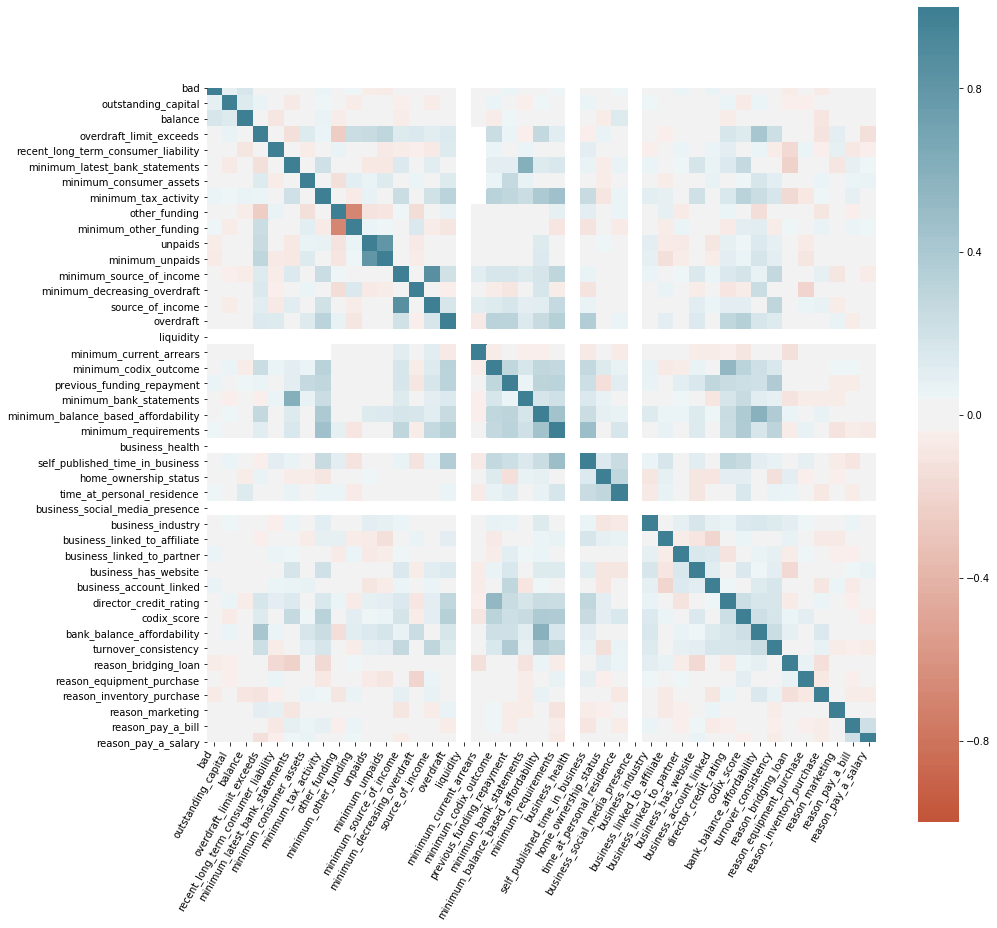

In [20]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')

 We observe that the relation with the target '`bad`' are strong in some variables and weak in others. We are only interested in variables which have some kind of relation with the target variable 'bad'. Therefore, in the next step we filter and take only variables whose the absolute value of correlation with the target is more than 0.03. We name them '`relevant_features`'.

In [21]:
cor_target=abs(corr['bad'])
relevant_features=cor_target[cor_target>0.03]

In [22]:
print(relevant_features)

bad                           1.000000
outstanding_capital           0.083174
balance                       0.158734
minimum_tax_activity          0.052386
other_funding                 0.037881
minimum_other_funding         0.046293
unpaids                       0.061247
minimum_unpaids               0.062841
previous_funding_repayment    0.059176
minimum_requirements          0.043266
home_ownership_status         0.030397
time_at_personal_residence    0.045399
business_linked_to_partner    0.050657
business_has_website          0.035855
business_account_linked       0.062632
reason_bridging_loan          0.052355
reason_inventory_purchase     0.064778
Name: bad, dtype: float64


As we can see, there are 16 variables having some kind of relation with the target variable '`bad`'. We now look at the correlations between these variables to find the one highly correlated. If variables are highly correlated with each other, then we need to keep only one and drop the rest.

In [23]:
corr_new=corr.loc[abs(corr['bad'])>0.03,relevant_features.index.tolist()]

[Text(0.5, 0, 'bad'),
 Text(1.5, 0, 'outstanding_capital'),
 Text(2.5, 0, 'balance'),
 Text(3.5, 0, 'minimum_tax_activity'),
 Text(4.5, 0, 'other_funding'),
 Text(5.5, 0, 'minimum_other_funding'),
 Text(6.5, 0, 'unpaids'),
 Text(7.5, 0, 'minimum_unpaids'),
 Text(8.5, 0, 'previous_funding_repayment'),
 Text(9.5, 0, 'minimum_requirements'),
 Text(10.5, 0, 'home_ownership_status'),
 Text(11.5, 0, 'time_at_personal_residence'),
 Text(12.5, 0, 'business_linked_to_partner'),
 Text(13.5, 0, 'business_has_website'),
 Text(14.5, 0, 'business_account_linked'),
 Text(15.5, 0, 'reason_bridging_loan'),
 Text(16.5, 0, 'reason_inventory_purchase')]

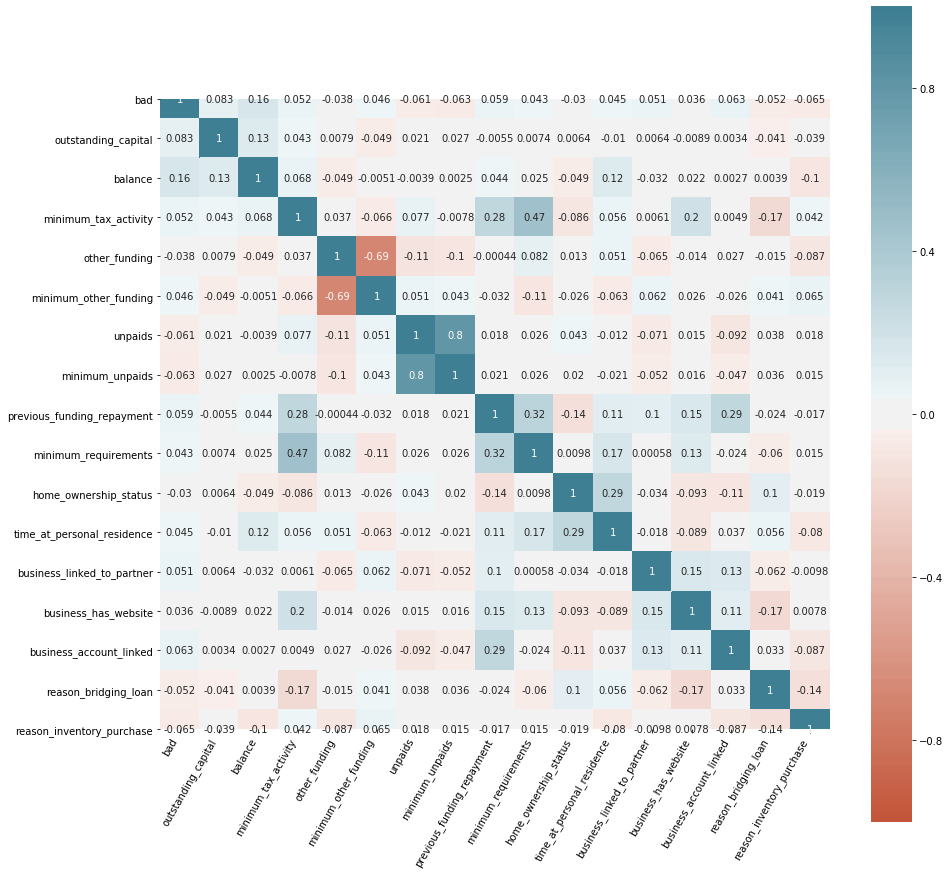

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_new,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')

 From the above heat map, it is seen that three pairs of features having high correlation. They are :
 
 * 'minimum_unpaids' and 'unpaids'
 * 'minimum_other_funding' and 'other_funding'
 * 'minimum_requirements' and 'minimum_tax_activity'
 
Hence, we would only keep one from each pair. We will keep 'minimum_unpaid','minimum_other_funding'and 'minimum_tax_activity'since their correlation with 'bad' are higher than that of 'unpaids','other_funding' and 'minimum_requirements'. 

In [25]:
relevant_features.index.tolist()

['bad',
 'outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'other_funding',
 'minimum_other_funding',
 'unpaids',
 'minimum_unpaids',
 'previous_funding_repayment',
 'minimum_requirements',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']

We create new dataframe `df_new` whichs the target '`bad`' and 13 selected variables (features).

In [26]:
df_new=df.loc[:, ['bad',
 'outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]

In [27]:
df_new.head()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase
0,1,20000.00,4533.34,1.0,1.0,1.0,1.0,0.0,0.75,0.0,1.0,1.0,0,0
1,0,0.00,0.00,1.0,1.0,1.0,0.0,0.5,0.50,0.0,1.0,0.0,0,1
2,0,0.00,-19466.66,0.0,1.0,1.0,0.0,0.5,1.00,0.0,0.0,0.0,0,2
3,0,416666.66,52916.67,1.0,1.0,1.0,0.0,0.5,0.50,0.0,1.0,0.0,1,0
4,0,0.00,-87173.10,1.0,0.0,1.0,1.0,0.0,0.50,0.0,1.0,1.0,1,0


In [28]:
df_new.tail()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase
1341,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.75,0.0,0.0,0.0,1,1
1342,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.75,0.0,0.0,0.0,1,1
1343,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.75,0.0,0.0,0.0,1,1
1344,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.25,0.0,0.0,1.0,0,0
1345,0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.25,0.0,0.0,1.0,0,0


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 14 columns):
bad                           1346 non-null int64
outstanding_capital           1346 non-null float64
balance                       1346 non-null float64
minimum_tax_activity          820 non-null float64
minimum_other_funding         1248 non-null float64
minimum_unpaids               1248 non-null float64
previous_funding_repayment    1286 non-null float64
home_ownership_status         1345 non-null float64
time_at_personal_residence    1345 non-null float64
business_linked_to_partner    1345 non-null float64
business_has_website          1345 non-null float64
business_account_linked       1345 non-null float64
reason_bridging_loan          1346 non-null int64
reason_inventory_purchase     1346 non-null int64
dtypes: float64(11), int64(3)
memory usage: 157.7 KB


We split data into:
* `X` containing independent variables(features)
* `y` the target variable(feature)

In [30]:
X=df_new.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]
y=df_new.loc[:,['bad']]

### Handling Missing Data

Let find out whether we have missing data and how many do we miss?

In [31]:
df_new.isnull().sum()

bad                             0
outstanding_capital             0
balance                         0
minimum_tax_activity          526
minimum_other_funding          98
minimum_unpaids                98
previous_funding_repayment     60
home_ownership_status           1
time_at_personal_residence      1
business_linked_to_partner      1
business_has_website            1
business_account_linked         1
reason_bridging_loan            0
reason_inventory_purchase       0
dtype: int64

It turns out that: 'minimum_tax_activity' has 526 missing values, 'minimum_other_funding' and 'minimum_unpaids' each has 98 missing values, 'previous_funding_repayment' has 60 missing values and some other features has one missing value each.

Our plan is to replace a missing value by the most frequent value in the same feature.

In [32]:
imp=SimpleImputer(missing_values= np.nan, strategy='most_frequent')
imp.fit(X)
X=imp.transform(X)

### Dimension Reduction PCA ( Principal Components Analysis)

The idea of PCA is to reduce the dimensionality of a dataset, while retaining as much variance in the data as possible.

All the variables should be on the same scale before applying PCA, otherwise a feature with large values will dominate the result. Below I use **StandardScaler** in scikit-learn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).

In [368]:
from sklearn.preprocessing import StandardScaler
X_standard = StandardScaler().fit_transform(X)
X_standard = pd.DataFrame(X_standard)
X_standard.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.068599,0.274700,0.657202,0.422651,0.376358,1.652942,-0.874712,0.434443,-0.249704,0.906300,0.939424,-0.420744,-0.532158
1,-0.163346,0.224965,0.657202,0.422651,0.376358,-0.651673,0.563727,-0.318144,-0.249704,0.906300,-1.064482,-0.420744,0.040870
2,-0.163346,0.011398,-1.521601,0.422651,0.376358,-0.651673,0.563727,1.187030,-0.249704,-1.103387,-1.064482,-0.420744,0.613897
3,4.668855,0.805509,0.657202,0.422651,0.376358,-0.651673,0.563727,-0.318144,-0.249704,0.906300,-1.064482,0.120155,-0.532158
4,-0.163346,-0.731403,0.657202,-2.366018,0.376358,1.652942,-0.874712,-0.318144,-0.249704,0.906300,0.939424,0.120155,-0.532158


In [369]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_standard)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.035801,-0.789542,-0.338295,0.170524,-0.861363,-0.206626,0.348769,-0.194708,-0.061710,-0.680505,0.523178,0.360712,-0.136405
1,0.241120,0.883166,-1.013338,-0.242563,-0.078618,0.694826,-0.132884,-1.054136,0.495820,-0.135626,-0.120183,-0.096730,0.197606
2,1.976530,0.123438,-0.152986,-0.582997,0.269549,0.712198,0.173578,0.370045,-1.369455,-0.218840,0.324749,0.777593,-0.339332
3,0.286378,-0.231537,-2.201469,2.653361,1.101616,2.291679,0.410750,1.082042,2.478900,-0.478963,0.221304,0.193481,-0.263340
4,-1.885650,-0.847481,0.334427,0.133687,0.420359,-1.869712,1.742015,-0.628122,0.695600,0.612376,-0.094450,0.148331,-0.024236


There are 13 features in the original data. So PCA will provide the same number of principal components. What are the variances explained by each of the principal components? Use **pca.explained_variance_ratio_** to return a vector of the variance:

In [370]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.1270347 , 0.10983186, 0.09469   , 0.0879411 , 0.08444432,
       0.07915834, 0.07561585, 0.06976647, 0.06185712, 0.05993513,
       0.05675432, 0.04821427, 0.04475653])

In [374]:
x_pca['target']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','target']
x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,target
0,-2.035801,-0.789542,-0.338295,0.170524,-0.861363,-0.206626,0.348769,-0.194708,-0.061710,-0.680505,0.523178,0.360712,-0.136405,1
1,0.241120,0.883166,-1.013338,-0.242563,-0.078618,0.694826,-0.132884,-1.054136,0.495820,-0.135626,-0.120183,-0.096730,0.197606,0
2,1.976530,0.123438,-0.152986,-0.582997,0.269549,0.712198,0.173578,0.370045,-1.369455,-0.218840,0.324749,0.777593,-0.339332,0
3,0.286378,-0.231537,-2.201469,2.653361,1.101616,2.291679,0.410750,1.082042,2.478900,-0.478963,0.221304,0.193481,-0.263340,0
4,-1.885650,-0.847481,0.334427,0.133687,0.420359,-1.869712,1.742015,-0.628122,0.695600,0.612376,-0.094450,0.148331,-0.024236,0


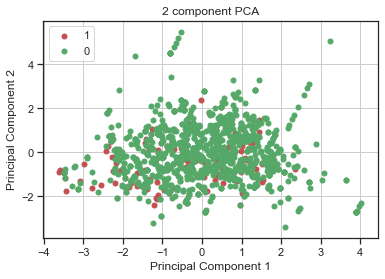

In [388]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
 indicesToKeep = x_pca['target'] == target
 ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
 , x_pca.loc[indicesToKeep, 'PC2']         
 , c = color
 , s=25)
ax.legend(targets)
ax.grid()

### Variables Distribution

Let look at the histograms of all independent features and the target feature.

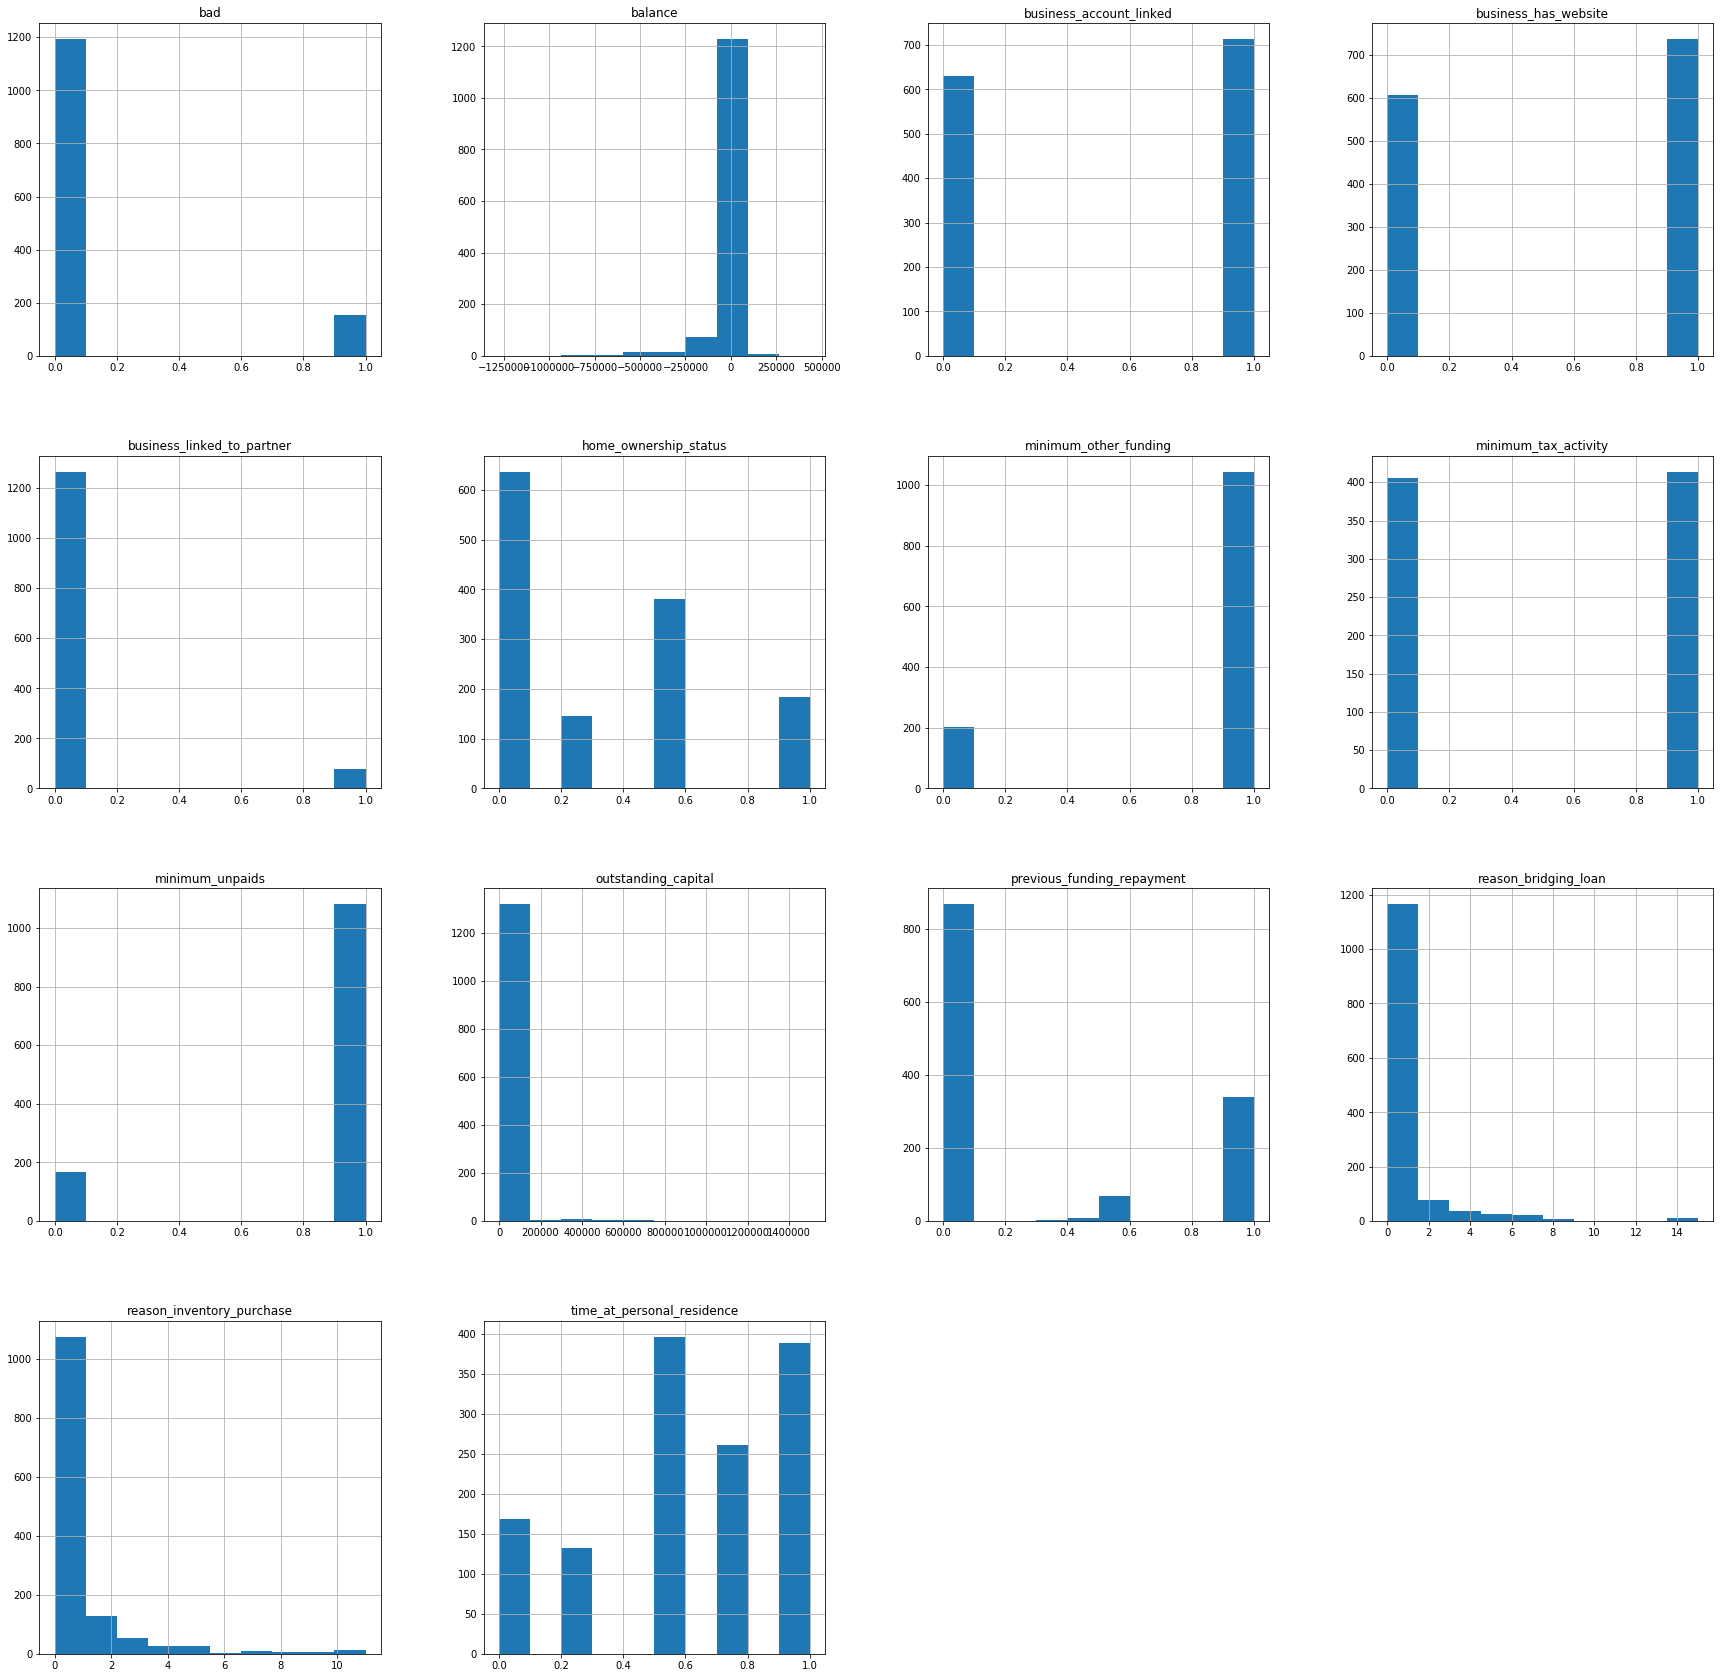

<Figure size 432x288 with 0 Axes>

In [33]:
df_new.hist(figsize=(30,30))
plt.figure()
plt.show()

We would like to see the difference in mean of independent variables(features) between the group of missing payments ('bad' = 1) and the group of not missing payments ('bad' = 0).

In [337]:
df_new_one=df_new.loc[df_new['bad'] == 1, :]
df_new_zero=df_new.loc[df_new['bad']==0,:]
df_new_one_mean=df_new_one.mean()
df_new_mean=df_new.mean()
df_new_zero_mean=df_new_zero.mean()

In [338]:
compare_mean=pd.DataFrame(index=df_new.columns,data={'original mean': df_new_mean.tolist(),'Bad mean':df_new_one_mean.tolist(),'Non_Bad mean':df_new_zero_mean.tolist()})


In [339]:
print(compare_mean)

                            original mean      Bad mean  Non_Bad mean
bad                              0.112927      1.000000      0.000000
outstanding_capital          14084.883421  34185.609243  11525.997052
balance                     -20505.607418  20045.869013 -25667.939426
minimum_tax_activity             0.504878      0.581395      0.495913
minimum_other_funding            0.836538      0.884892      0.830478
minimum_unpaids                  0.866186      0.805755      0.873760
previous_funding_repayment       0.295961      0.368918      0.286690
home_ownership_status            0.304275      0.274671      0.308047
time_at_personal_residence       0.605762      0.648026      0.600377
business_linked_to_partner       0.058736      0.092105      0.054484
business_has_website             0.548699      0.598684      0.542330
business_account_linked          0.530855      0.618421      0.519698
reason_bridging_loan             0.777860      0.506579      0.812395
reason_inventory_pur

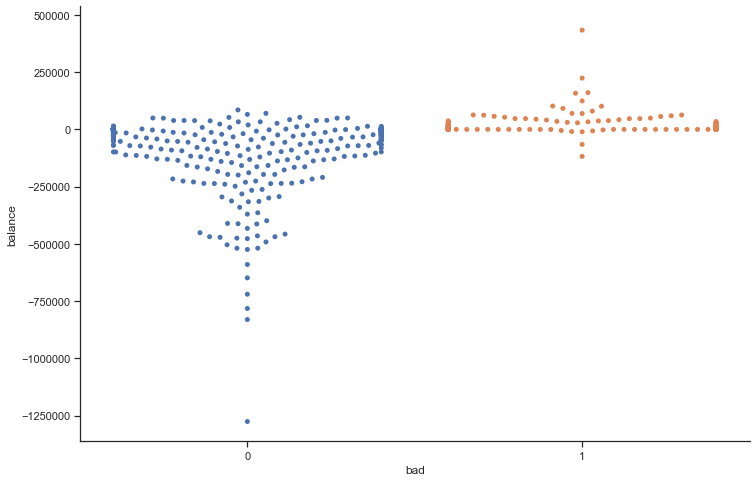

In [353]:
g = sns.swarmplot(y ="balance",
              x = "bad" , 
              data = df_new
                 )
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

The above swarmplot shows that observations with target feature 'bad'= 0 are more likely to have negative 'balance' and observations with target feature 'bad'= 1 are more likely to have positive 'balance'. Which makes sense here since company with arrears tend to miss payments more.

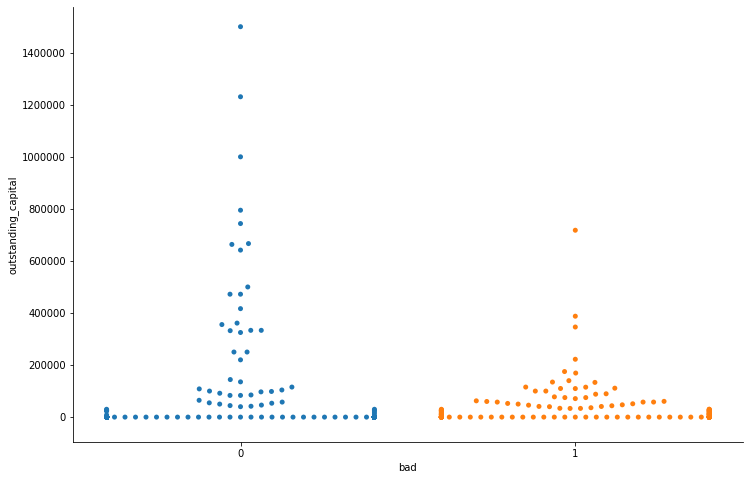

In [314]:
g = sns.swarmplot(y ="outstanding_capital",
              x = "bad" , 
              data = df_new)
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(12,8)
plt.show()

There are more observation with high 'outstanding_capital' in the group of not missing payments('bad'=0) than in the group of missing payments ('bad'=1).

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


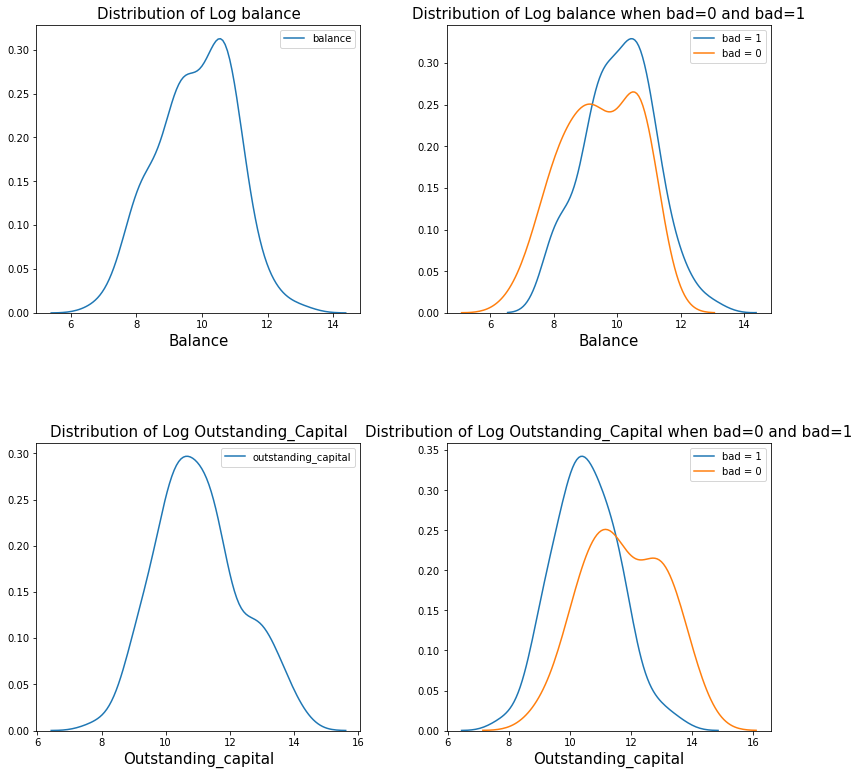

In [34]:
plt.axes([0.05,0.05,0.75,1])
sns.kdeplot(np.log(df['outstanding_capital']))
plt.xlabel('Outstanding_capital',fontsize=15)
plt.title('Distribution of Log Outstanding_Capital',fontsize=15);

plt.axes([1,0.05,0.75,1])
sns.kdeplot(np.log(df.loc[df['bad'] == 1, 'outstanding_capital']), label = 'bad = 1')
sns.kdeplot(np.log(df.loc[df['bad'] == 0, 'outstanding_capital']), label = 'bad = 0');
plt.xlabel('Outstanding_capital',fontsize=15)
plt.title('Distribution of Log Outstanding_Capital when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,1.5,0.75,1])
sns.kdeplot(np.log(df['balance']))
plt.xlabel('Balance',fontsize=15)
plt.title('Distribution of Log balance',fontsize=15);

plt.axes([1,1.5,0.75,1])
sns.kdeplot(np.log(df.loc[df['bad'] == 1, 'balance']), label = 'bad = 1')
sns.kdeplot(np.log(df.loc[df['bad'] == 0, 'balance']), label = 'bad = 0');
plt.xlabel('Balance',fontsize=15)
plt.title('Distribution of Log balance when bad=0 and bad=1',fontsize=15);

plt.show()

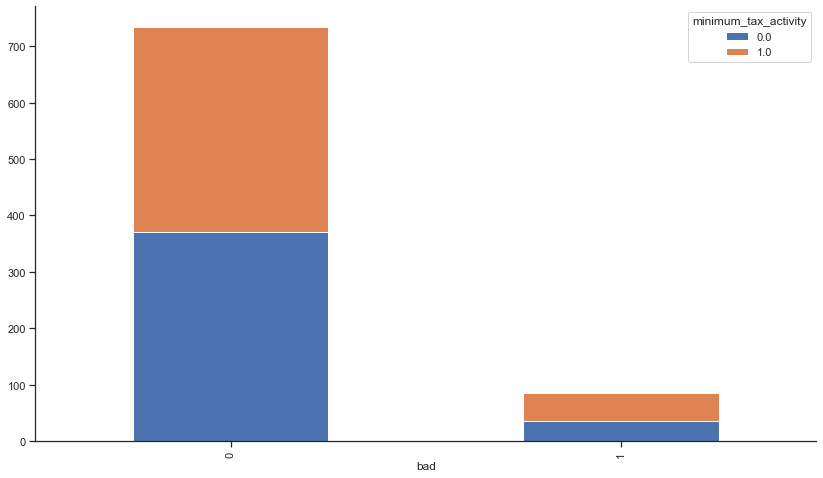

In [340]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'minimum_tax_activity']).size().reset_index().pivot(columns='bad', index='minimum_tax_activity', values=0).reset_index()

g = df_plot.set_index('minimum_tax_activity').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

In the group of not missing payments, 49.6% summited tax return('minimum_tax_activity' = 1). While in the group of missing payments, 58% summited tax return.

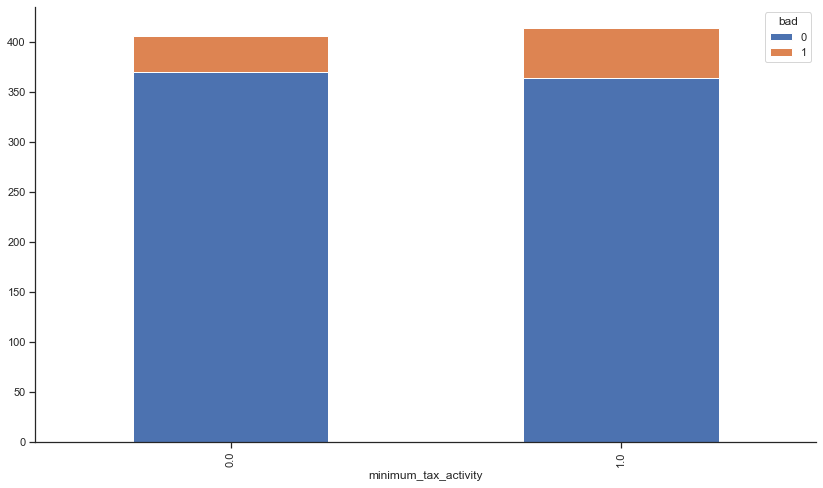

In [341]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'minimum_tax_activity']).size().reset_index().pivot(columns='minimum_tax_activity', index='bad', values=0).reset_index()

g = df_plot.set_index('bad').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

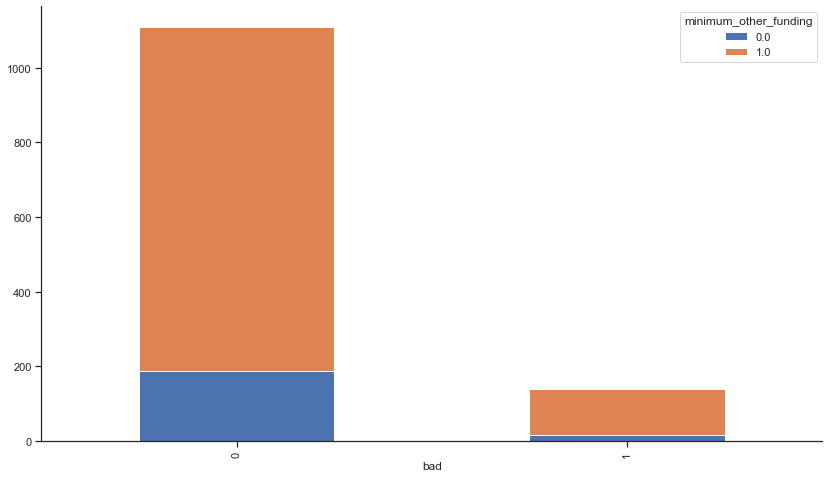

In [342]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'minimum_other_funding']).size().reset_index().pivot(columns='bad', index='minimum_other_funding', values=0).reset_index()

g = df_plot.set_index('minimum_other_funding').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

In the group of not missing payments, 83% have loan elsewhere('minimum_other_funding' = 1). While in the group of missing payments, 88.5% have loan elsewhere.

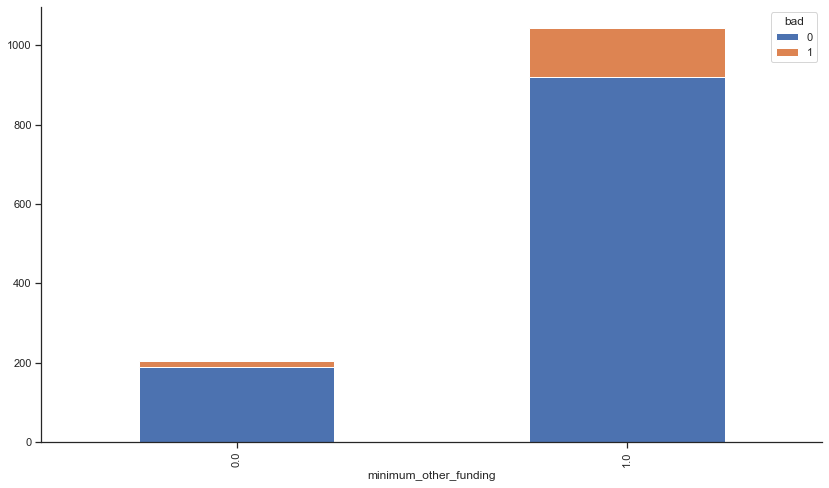

In [343]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'minimum_other_funding']).size().reset_index().pivot(columns='minimum_other_funding', index='bad', values=0).reset_index()

g = df_plot.set_index('bad').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

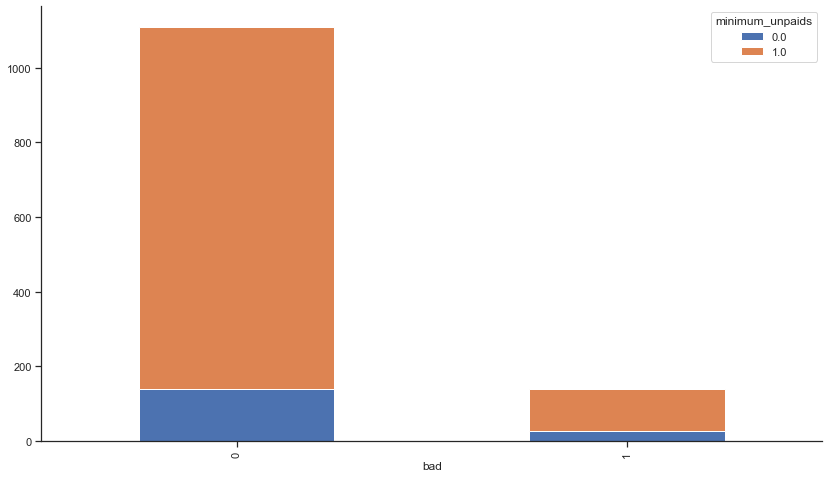

In [344]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'minimum_unpaids']).size().reset_index().pivot(columns='bad', index='minimum_unpaids', values=0).reset_index()

g = df_plot.set_index('minimum_unpaids').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

In the group of not missing payments, 87.4% have payments unpaid at the other loans ('minimum_unpaids' = 1). While in the group of missing payments, 80.6% have payments unpaid at the other loans.

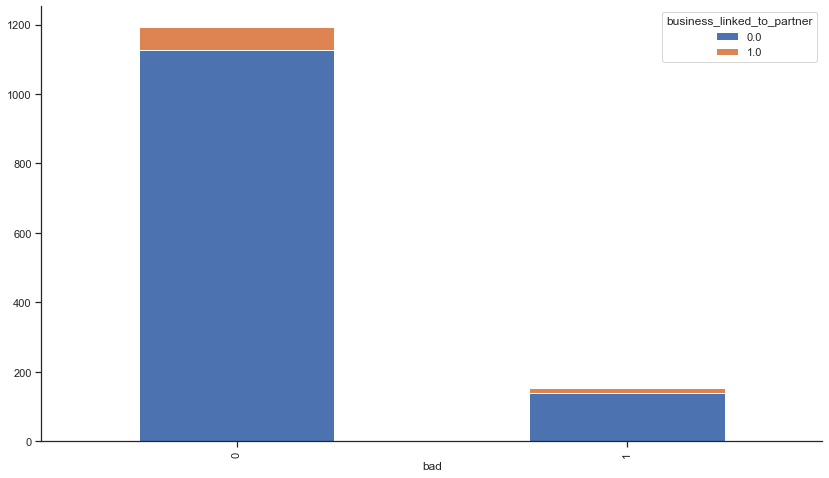

In [345]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'business_linked_to_partner']).size().reset_index().pivot(columns='bad', index='business_linked_to_partner', values=0).reset_index()

g = df_plot.set_index('business_linked_to_partner').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

In the group of not missing payments, 5.4% is a part of other partner application('business_linked_to_partner' = 1). While in the group of missing payments, 9.2% is a part of other partner application.

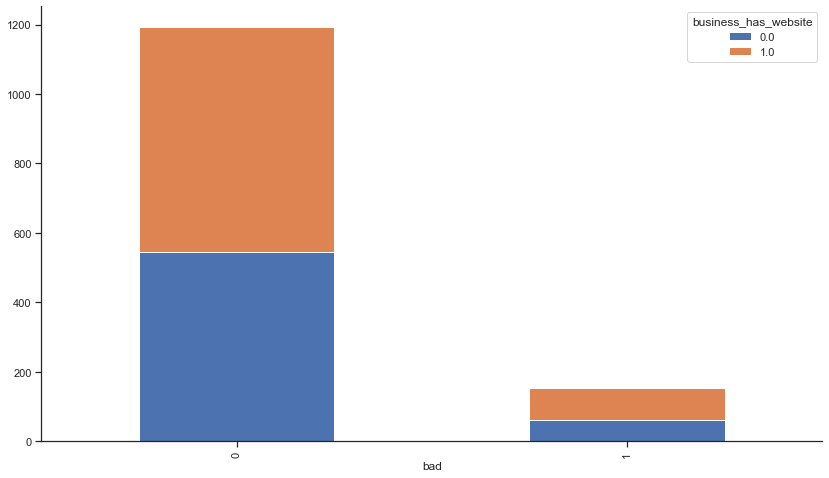

In [350]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'business_has_website']).size().reset_index().pivot(columns='bad', index='business_has_website', values=0).reset_index()

g = df_plot.set_index('business_has_website').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

In the group of not missing payments, 54.2% has website('business_has_website' = 1). While in the group of missing payments, 59.9% has website.

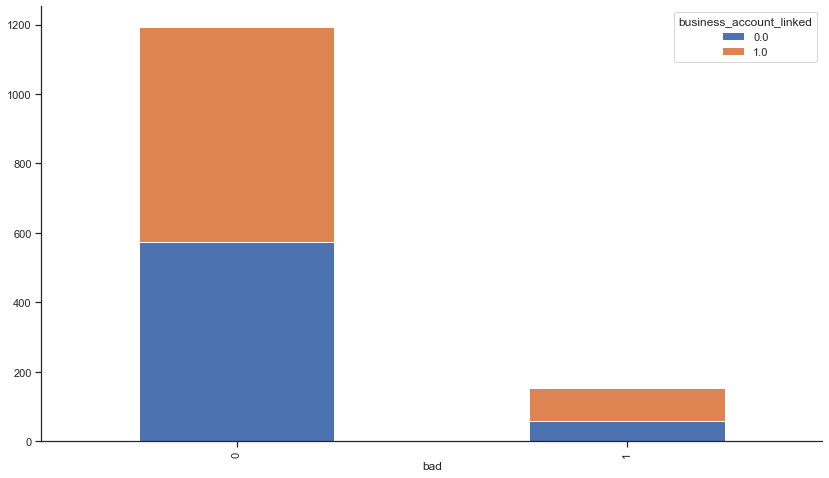

In [351]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'business_account_linked']).size().reset_index().pivot(columns='bad', index='business_account_linked', values=0).reset_index()

g = df_plot.set_index('business_account_linked').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

In the group of not missing payments, 52% has bank statements from the business('business_account_linked' = 1). While in the group of missing payments, 61.8% has bank statements from the business.

In [361]:
per1_brid_loan = df_new_zero.loc[df_new_zero['reason_bridging_loan']!=0,:].shape[0]/df_new_zero.shape[0]*100
per2_brid_loan = df_new_one.loc[df_new_one['reason_bridging_loan']!=0,:].shape[0]/df_new_one.shape[0]*100
print('In the group of not missing payments,{} % get the loan for bridging reason. In the group of missing payments, {}% get the loan for bridging reason.'.format(per1_brid_loan,per2_brid_loan))

In the group of not missing payments,35.594639865996655 % get the loan for bridging reason. In the group of missing payments, 26.973684210526315% get the loan for bridging reason.


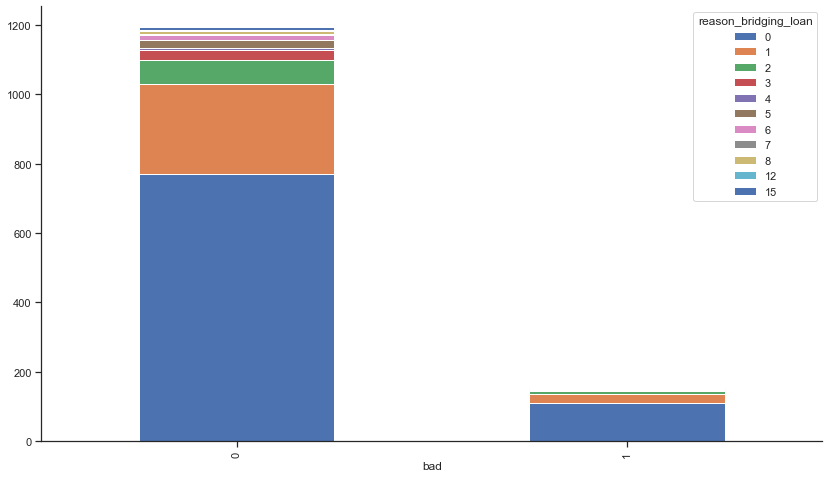

In [354]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'reason_bridging_loan']).size().reset_index().pivot(columns='bad', index='reason_bridging_loan', values=0).reset_index()

g = df_plot.set_index('reason_bridging_loan').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

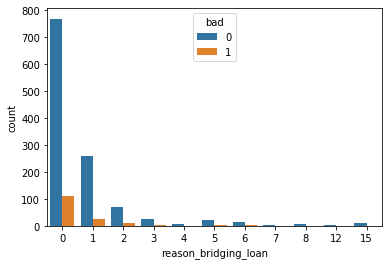

In [49]:
sns.countplot(x='reason_bridging_loan',hue='bad',data=df)
plt.show()

In [365]:
per1_inv_pur = df_new_zero.loc[df_new_zero['reason_inventory_purchase']!=0,:].shape[0]/df_new_zero.shape[0]*100
per2_inv_pur = df_new_one.loc[df_new_one['reason_inventory_purchase']!=0,:].shape[0]/df_new_one.shape[0]*100
print('In the group of not missing payments,{} % get the loan for inventory reason. In the group of missing payments, {}% get the loan for inventory purchase reason.'.format(per1_inv_pur,per2_inv_pur))

In the group of not missing payments,41.289782244556115 % get the loan for inventory reason. In the group of missing payments, 34.21052631578947% get the loan for inventory purchase reason.


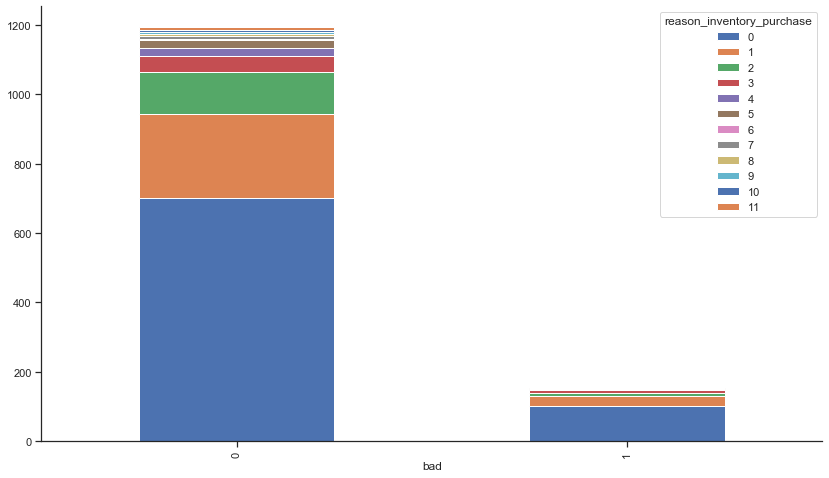

In [358]:
sns.set(style="ticks")
                     
df_plot = df_new.groupby(['bad', 'reason_inventory_purchase']).size().reset_index().pivot(columns='bad', index='reason_inventory_purchase', values=0).reset_index()

g = df_plot.set_index('reason_inventory_purchase').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

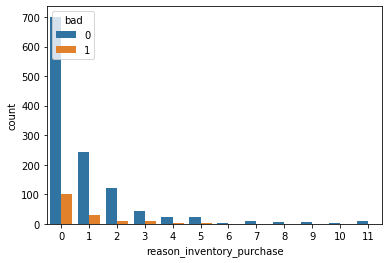

In [50]:
sns.countplot(x='reason_inventory_purchase',hue='bad',data=df)
plt.show()

## Machine Learning Algorithms

Here, 

y = value of target feature 'bad'

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a machine learning model and predict value of y. 

We are going to use supervised machine learning algorithm to solve this classification problem.

Since the accuracy is not enough to tell how good is our model, we are going to find the confusion matrix, precision, recall, f1-score and the AUC-ROC for all models.

**Confusion matrix**:

 

  Name|Predicted Positive | Predicted Negative
--- |--- | --- 
Actual Positive |TP | FN
Actual Negative |FP | TN

* Positive P: Observation has label 0 ('bad' = 0).
* Negative N: Observation has label 1 ('bad' = 1).
* True Positive TP: Observation has label 0 ('bad'= 0), and is predicted to have label 0.
* True Negative TN :Observation has label 1 ('bad'= 1), and is predicted to have label 1.
* False Positive FP: Observation has label 1 ('bad'= 1), and is predicted to have label 0.
* False Negative FN: Observation has label 0 ('bad'= 0), and is predicted to have label 1.

**Precision**
$$precision= \frac{TP}{TP+FP}$$


High Precision indicates an example labelled as positive is indeed positive (a small number of FP).

**Recall**
$$Recall= \frac{TP}{TP+FN}$$


High Recall indicates the class is correctly recognized (a small number of FN).

**F-measure**

Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them.

$$F-measure = \frac{2*Recall*Precision}{Recall+Precision}$$

**AUC-ROC**

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is plotted with TPR(True positive rate) against the FPR(False Positive rate) where TPR is on y-axis and FPR is on the x-axis.

AUC-ROC: the area under the curve ROC. It tells how much model is capable of distinguishing classes. Higher the AUC, better the model is at distinguishing between classes.

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [55]:
y_train.describe()

,bad
count,942.000000
mean,0.114650
std,0.318768
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [56]:
df_X_train=pd.DataFrame(data=X_train,index=y_train.index,columns=['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase'])

In [57]:
df_X_train.head()

,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase
1251,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.0,1.0,1.0,1.0,0.0
260,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.75,0.0,1.0,1.0,0.0,4.0
668,0.0,0.0,0.0,1.0,0.0,0.0,0.25,1.00,0.0,0.0,1.0,0.0,1.0
682,0.0,0.0,1.0,1.0,1.0,0.0,0.50,1.00,0.0,1.0,0.0,1.0,0.0
672,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.50,0.0,1.0,1.0,0.0,0.0


In [58]:
df_train=pd.concat([df_X_train,y_train],axis=1)

In [59]:
df_train.head()

,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase,bad
1251,0.0,0.0,1.0,1.0,1.0,0.0,0.00,0.00,0.0,1.0,1.0,1.0,0.0,0
260,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.75,0.0,1.0,1.0,0.0,4.0,0
668,0.0,0.0,0.0,1.0,0.0,0.0,0.25,1.00,0.0,0.0,1.0,0.0,1.0,0
682,0.0,0.0,1.0,1.0,1.0,0.0,0.50,1.00,0.0,1.0,0.0,1.0,0.0,0
672,0.0,0.0,0.0,1.0,1.0,0.0,0.00,0.50,0.0,1.0,1.0,0.0,0.0,0


We observe that the target variable 'bad' in the traing set and also in original data frame is imbalanced: 11.5% of the data are 1 and 88.5% are 0. This bias in the training dataset can influence many machine learning algorithms. We can easily build a highly accurate classifier model by setting the target variable equal to 0. Then this model is right in 88.5% of the data which is pretty accurate. However, this kind of model is not useful. One way to deal with the imbalanced is to use oversampling or undersampling.

### Oversampling and Undersampling
Oversampling involves supplementing the training data with multiple copies of some of the minority class. Undersampling removes samples from the majority class.

In [60]:
def sampling(df,over):
    df_yes=df[df['bad']==1]
    df_no=df[df['bad']==0]
    if(df_yes.shape[0]>df_no.shape[0]):
        yes_is_bigger = 1
        bigger = df_yes.shape[0]
        smaller =  df_no.shape[0]
    else:
        yes_is_bigger = 0
        bigger = df_no.shape[0]
        smaller =  df_yes.shape[0]
    
    if (over == True and yes_is_bigger == 1):
        no = df_no.sample(n=bigger,replace=True,random_state=1222)
        yes = df_yes
    if (over == True and yes_is_bigger == 0):
        yes = df_yes.sample(n=bigger,replace=True,random_state=1222)
        no = df_no
    if (over == False and yes_is_bigger == 0):
        no = df_no.sample(n=smaller,replace=False,random_state=1222)
        yes = df_yes
    if (over == False and yes_is_bigger == 1):
        yes = df_yes.sample(n=smaller,replace=False,random_state=1222)
        no = df_no
        
    return_df = pd.DataFrame(yes.append(pd.DataFrame(data = no)))
    return return_df

In [61]:
df_oversampling=sampling(df_train,True)

In [62]:
df_oversampling.head()

,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase,bad
986,47180.00,53300.00,1.0,1.0,1.0,1.0,0.0,0.00,0.0,1.0,1.0,0.0,0.0,1
689,8076.85,9360.33,1.0,1.0,1.0,1.0,0.5,1.00,1.0,1.0,1.0,1.0,2.0,1
776,40000.00,47200.00,0.0,1.0,0.0,0.0,1.0,0.75,0.0,1.0,0.0,0.0,0.0,1
547,169230.73,63178.57,0.0,1.0,1.0,0.0,0.0,0.00,0.0,1.0,0.0,0.0,4.0,1
640,0.00,0.00,1.0,1.0,1.0,0.0,0.0,0.50,0.0,1.0,0.0,0.0,1.0,1


In [63]:
df_oversampling[df_oversampling['bad']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 1251 to 1126
Data columns (total 14 columns):
outstanding_capital           834 non-null float64
balance                       834 non-null float64
minimum_tax_activity          834 non-null float64
minimum_other_funding         834 non-null float64
minimum_unpaids               834 non-null float64
previous_funding_repayment    834 non-null float64
home_ownership_status         834 non-null float64
time_at_personal_residence    834 non-null float64
business_linked_to_partner    834 non-null float64
business_has_website          834 non-null float64
business_account_linked       834 non-null float64
reason_bridging_loan          834 non-null float64
reason_inventory_purchase     834 non-null float64
bad                           834 non-null int64
dtypes: float64(13), int64(1)
memory usage: 97.7 KB


In [64]:
df_oversampling[df_oversampling['bad']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834 entries, 986 to 206
Data columns (total 14 columns):
outstanding_capital           834 non-null float64
balance                       834 non-null float64
minimum_tax_activity          834 non-null float64
minimum_other_funding         834 non-null float64
minimum_unpaids               834 non-null float64
previous_funding_repayment    834 non-null float64
home_ownership_status         834 non-null float64
time_at_personal_residence    834 non-null float64
business_linked_to_partner    834 non-null float64
business_has_website          834 non-null float64
business_account_linked       834 non-null float64
reason_bridging_loan          834 non-null float64
reason_inventory_purchase     834 non-null float64
bad                           834 non-null int64
dtypes: float64(13), int64(1)
memory usage: 97.7 KB


In [65]:
df_under = sampling(df_train, False)

In [66]:
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 1259 to 656
Data columns (total 14 columns):
outstanding_capital           216 non-null float64
balance                       216 non-null float64
minimum_tax_activity          216 non-null float64
minimum_other_funding         216 non-null float64
minimum_unpaids               216 non-null float64
previous_funding_repayment    216 non-null float64
home_ownership_status         216 non-null float64
time_at_personal_residence    216 non-null float64
business_linked_to_partner    216 non-null float64
business_has_website          216 non-null float64
business_account_linked       216 non-null float64
reason_bridging_loan          216 non-null float64
reason_inventory_purchase     216 non-null float64
bad                           216 non-null int64
dtypes: float64(13), int64(1)
memory usage: 25.3 KB


In [67]:
df_under[df_under['bad']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1259 to 860
Data columns (total 14 columns):
outstanding_capital           108 non-null float64
balance                       108 non-null float64
minimum_tax_activity          108 non-null float64
minimum_other_funding         108 non-null float64
minimum_unpaids               108 non-null float64
previous_funding_repayment    108 non-null float64
home_ownership_status         108 non-null float64
time_at_personal_residence    108 non-null float64
business_linked_to_partner    108 non-null float64
business_has_website          108 non-null float64
business_account_linked       108 non-null float64
reason_bridging_loan          108 non-null float64
reason_inventory_purchase     108 non-null float64
bad                           108 non-null int64
dtypes: float64(13), int64(1)
memory usage: 12.7 KB


In [68]:
df_under[df_under['bad']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 84 to 656
Data columns (total 14 columns):
outstanding_capital           108 non-null float64
balance                       108 non-null float64
minimum_tax_activity          108 non-null float64
minimum_other_funding         108 non-null float64
minimum_unpaids               108 non-null float64
previous_funding_repayment    108 non-null float64
home_ownership_status         108 non-null float64
time_at_personal_residence    108 non-null float64
business_linked_to_partner    108 non-null float64
business_has_website          108 non-null float64
business_account_linked       108 non-null float64
reason_bridging_loan          108 non-null float64
reason_inventory_purchase     108 non-null float64
bad                           108 non-null int64
dtypes: float64(13), int64(1)
memory usage: 12.7 KB


In [69]:
X_train_over=df_oversampling.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]
y_train_over=df_oversampling.loc[:,['bad']]

In [70]:
X_train_under=df_under.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked',
 'reason_bridging_loan',
 'reason_inventory_purchase']]
y_train_under=df_under.loc[:,['bad']]

## K-Nearest Neighbor

The main idea of KNN is that we look at the specified number examples (K) closest to the data point, then vote for th most frequent label.

We run the KNN algorithm several times with different values of K and choose the K that works the best ( having high train and test accuracy).

### Original training set

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [72]:
knn_org = KNeighborsClassifier(n_neighbors = 5)

In [73]:
knn_org.fit(X_train,np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
knn_org.score(X_test,y_test)

0.9282178217821783

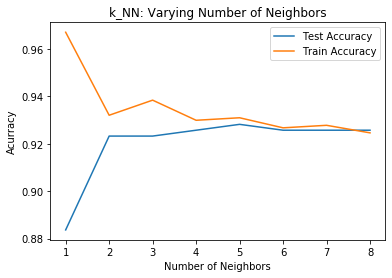

In [75]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train))
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [76]:
print(confusion_matrix(y_test,knn_org.predict(X_test)))

[[360   0]
 [ 29  15]]


The confusion matrix tells us that 
* Positive ( Observation has label 0 ('bad' = 0)): P = 360.
* Negative ( Observation has label 1 ('bad' = 1)): N = 44.
* True Positive (Observation has label 0 ('bad'= 0), and is predicted to have label 0): TP = 360.
* True Negative (Observation has label 1 ('bad'= 1), and is predicted to have label 1): TN = 15.
* False Positive (Observation has label 1 ('bad'= 1), and is predicted to have label 0): FP = 29.
* False Negative (Observation has label 0 ('bad'= 0), and is predicted to have label 1): FP = 0.

We are going to use **classification_report** to find precision, recall and f1-score. 



In [77]:
print(classification_report(y_test,knn_org.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       360
           1       1.00      0.34      0.51        44

    accuracy                           0.93       404
   macro avg       0.96      0.67      0.73       404
weighted avg       0.93      0.93      0.91       404



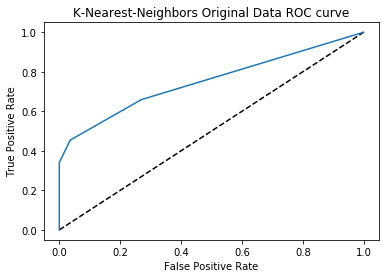

In [80]:
y_pred_prob_knn_org=knn_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_knn_org)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest-Neighbors Original Data ROC curve')
plt.show()

In [389]:
print(roc_auc_score(y_test,y_pred_prob_knn_org))

0.7503156565656566


### Oversampling data set

In [81]:
knn_over = KNeighborsClassifier(n_neighbors = 2)

In [82]:
knn_over.fit(X_train_over,np.ravel(y_train_over))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [83]:
knn_over.score(X_test,y_test)

0.8415841584158416

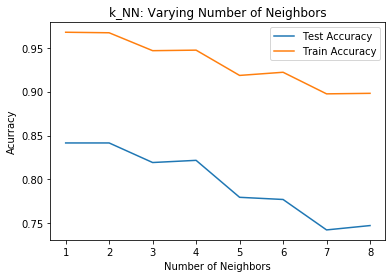

In [84]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_over,np.ravel(y_train_over))
    train_accuracy[i]=knn.score(X_train_over,y_train_over)
    test_accuracy[i]=knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [85]:
print(confusion_matrix(y_test,knn_over.predict(X_test)))

[[321  39]
 [ 25  19]]


In [86]:
print(classification_report(y_test,knn_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       360
           1       0.33      0.43      0.37        44

    accuracy                           0.84       404
   macro avg       0.63      0.66      0.64       404
weighted avg       0.86      0.84      0.85       404



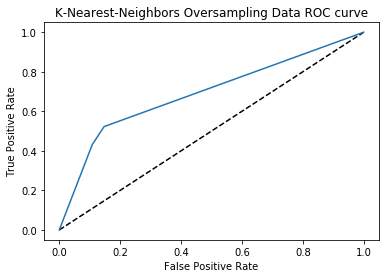

0.6912247474747475


In [87]:
y_pred_prob_knn_over=knn_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_knn_over)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest-Neighbors Oversampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_knn_over))

### Undersampling Data 

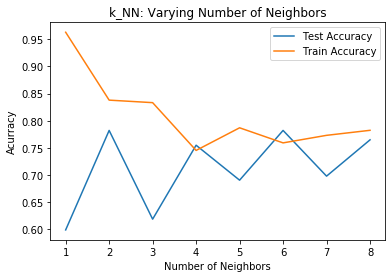

In [88]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_under,np.ravel(y_train_under))
    train_accuracy[i]=knn.score(X_train_under,y_train_under)
    test_accuracy[i]=knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

In [89]:
knn_under= KNeighborsClassifier(n_neighbors = 6)

In [90]:
knn_under.fit(X_train_under,np.ravel(y_train_under))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [91]:
print(confusion_matrix(y_test,knn_under.predict(X_test)))

[[293  67]
 [ 21  23]]


In [92]:
print(classification_report(y_test,knn_under.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       360
           1       0.26      0.52      0.34        44

    accuracy                           0.78       404
   macro avg       0.59      0.67      0.61       404
weighted avg       0.86      0.78      0.81       404



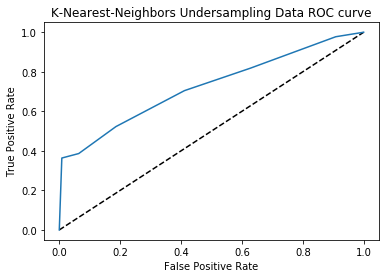

0.7234217171717172


In [93]:
y_pred_prob_knn_under=knn_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_knn_under)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Nearest-Neighbors Undersampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_knn_under))

## Logistic Regression

### Original Data

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [94]:
logreg_org = LogisticRegression()

In [95]:
logreg_org.fit(X_train,np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
print(confusion_matrix(y_test,logreg_org.predict(X_test)))

[[359   1]
 [ 35   9]]


In [97]:
print(classification_report(y_test,logreg_org.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       360
           1       0.90      0.20      0.33        44

    accuracy                           0.91       404
   macro avg       0.91      0.60      0.64       404
weighted avg       0.91      0.91      0.88       404



In [98]:
y_pred_prob_org=logreg_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_org)

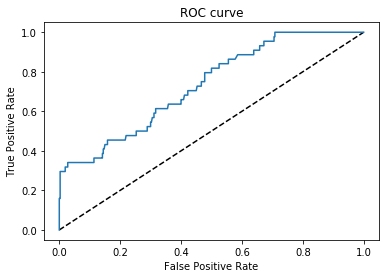

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [100]:
print(roc_auc_score(y_test,y_pred_prob_org))

0.7324810606060607


### Oversampling Data

In [101]:
logreg_over = LogisticRegression()
logreg_over.fit(X_train_over,np.ravel(y_train_over))
print(confusion_matrix(y_test,logreg_over.predict(X_test)))
print(classification_report(y_test,logreg_over.predict(X_test)))

[[229 131]
 [ 15  29]]
              precision    recall  f1-score   support

           0       0.94      0.64      0.76       360
           1       0.18      0.66      0.28        44

    accuracy                           0.64       404
   macro avg       0.56      0.65      0.52       404
weighted avg       0.86      0.64      0.71       404



In [102]:
y_pred_prob_over=logreg_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_over)

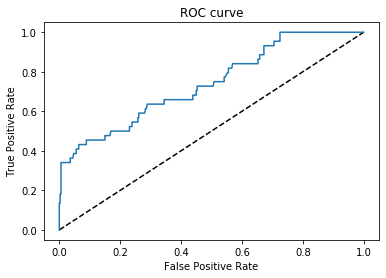

In [103]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [104]:
print(roc_auc_score(y_test,y_pred_prob_over))

0.7402462121212121


### Undersampling

In [105]:
logreg_under = LogisticRegression()
logreg_under.fit(X_train_under,np.ravel(y_train_under))
print(confusion_matrix(y_test,logreg_under.predict(X_test)))
print(classification_report(y_test,logreg_under.predict(X_test)))

[[351   9]
 [ 24  20]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       360
           1       0.69      0.45      0.55        44

    accuracy                           0.92       404
   macro avg       0.81      0.71      0.75       404
weighted avg       0.91      0.92      0.91       404



In [106]:
y_pred_prob_under=logreg_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_under)

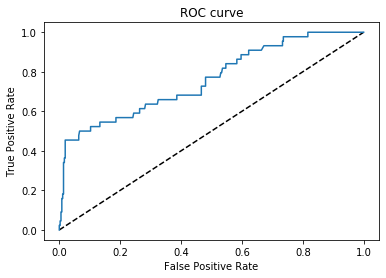

In [107]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [108]:
print(roc_auc_score(y_test,y_pred_prob_under))

0.760132575757576


## Support Vector Machine

### Original Data

In [109]:
svc_org = SVC(probability=True)
svc_org.fit(X_train,np.ravel(y_train))
print(confusion_matrix(y_test,svc_org.predict(X_test)))
print(classification_report(y_test,svc_org.predict(X_test)))

[[360   0]
 [ 36   8]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       360
           1       1.00      0.18      0.31        44

    accuracy                           0.91       404
   macro avg       0.95      0.59      0.63       404
weighted avg       0.92      0.91      0.88       404



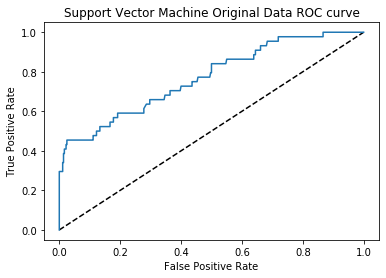

0.7697916666666667


In [110]:
y_pred_prob_svc_org=svc_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_svc_org)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine Original Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_svc_org))

### Oversampling Data

In [111]:
svc_over = SVC(probability=True)
svc_over.fit(X_train_over,np.ravel(y_train_over))
print(confusion_matrix(y_test,svc_over.predict(X_test)))
print(classification_report(y_test,svc_over.predict(X_test)))

[[354   6]
 [ 28  16]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       360
           1       0.73      0.36      0.48        44

    accuracy                           0.92       404
   macro avg       0.83      0.67      0.72       404
weighted avg       0.90      0.92      0.90       404



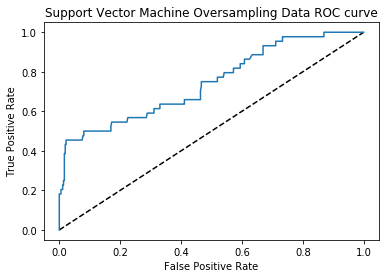

0.7447916666666667


In [112]:
y_pred_prob_svc_over=svc_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_svc_over)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine Oversampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_svc_over))

### Undersampling Data

In [113]:
svc_under = SVC(probability=True)
svc_under.fit(X_train_under,np.ravel(y_train_under))
print(confusion_matrix(y_test,svc_under.predict(X_test)))
print(classification_report(y_test,svc_under.predict(X_test)))

[[351   9]
 [ 29  15]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       360
           1       0.62      0.34      0.44        44

    accuracy                           0.91       404
   macro avg       0.77      0.66      0.69       404
weighted avg       0.89      0.91      0.89       404



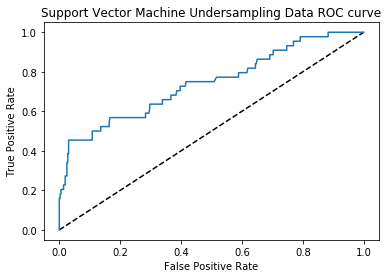

0.742203282828283


In [114]:
y_pred_prob_svc_under=svc_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_svc_under)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine Undersampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_svc_under))

## Stochastic Gradient Descent

### Original Data

In [115]:
from sklearn.linear_model import SGDClassifier

In [116]:
sgd_org = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_org.fit(X_train, np.ravel(y_train))
print(confusion_matrix(y_test,sgd_org.predict(X_test)))
print(classification_report(y_test,sgd_org.predict(X_test)))


[[358   2]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       360
           1       0.90      0.41      0.56        44

    accuracy                           0.93       404
   macro avg       0.92      0.70      0.76       404
weighted avg       0.93      0.93      0.92       404



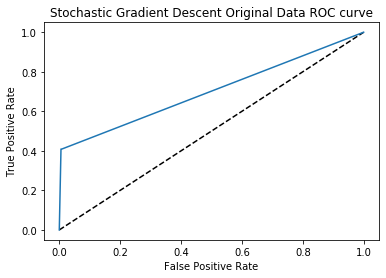

0.7009469696969698


In [117]:
y_pred_prob_sgd_org=sgd_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_sgd_org)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stochastic Gradient Descent Original Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_sgd_org))

### Oversampling Data

In [118]:
sgd_over = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_over.fit(X_train_over, np.ravel(y_train_over))
print(confusion_matrix(y_test,sgd_over.predict(X_test)))
print(classification_report(y_test,sgd_over.predict(X_test)))



[[327  33]
 [ 23  21]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       360
           1       0.39      0.48      0.43        44

    accuracy                           0.86       404
   macro avg       0.66      0.69      0.67       404
weighted avg       0.87      0.86      0.87       404



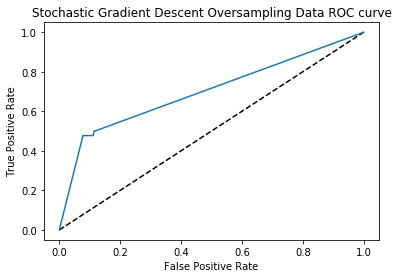

0.6997159090909091


In [119]:
y_pred_prob_sgd_over=sgd_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_sgd_over)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stochastic Gradient Descent Oversampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_sgd_over))

### Undersampling Data

In [120]:
sgd_under = SGDClassifier(loss='modified_huber', shuffle=True,random_state=101)
sgd_under.fit(X_train_under, np.ravel(y_train_under))
print(confusion_matrix(y_test,sgd_under.predict(X_test)))
print(classification_report(y_test,sgd_under.predict(X_test)))

[[193 167]
 [ 14  30]]
              precision    recall  f1-score   support

           0       0.93      0.54      0.68       360
           1       0.15      0.68      0.25        44

    accuracy                           0.55       404
   macro avg       0.54      0.61      0.46       404
weighted avg       0.85      0.55      0.63       404



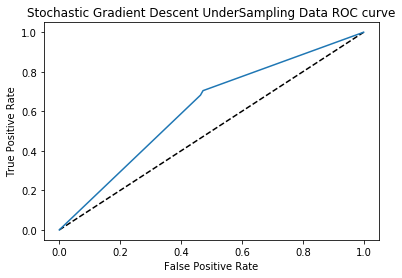

0.6137310606060606


In [121]:
y_pred_prob_sgd_under=sgd_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_sgd_under)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Stochastic Gradient Descent UnderSampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_sgd_under))

## Random Forest

### Original Data

In [122]:
from sklearn.ensemble import RandomForestClassifier

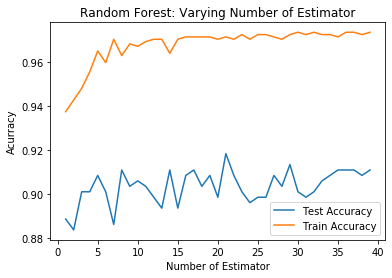

In [178]:
neighbors=np.arange(1,40)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    rf=RandomForestClassifier(n_estimators=k)
    rf.fit(X_train,np.ravel(y_train))
    train_accuracy[i]=rf.score(X_train,y_train)
    test_accuracy[i]=rf.score(X_test,y_test)
    
plt.title('Random Forest: Varying Number of Estimator')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Estimator')
plt.ylabel('Acurracy')
plt.show()

In [183]:
rf_org = RandomForestClassifier(n_estimators=21)
rf_org.fit(X_train, np.ravel(y_train))
print(confusion_matrix(y_test,rf_org.predict(X_test)))
print(classification_report(y_test,rf_org.predict(X_test)))

[[354   6]
 [ 30  14]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       360
           1       0.70      0.32      0.44        44

    accuracy                           0.91       404
   macro avg       0.81      0.65      0.69       404
weighted avg       0.90      0.91      0.90       404



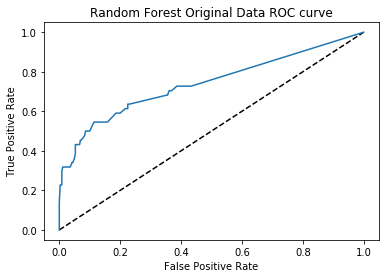

0.7403409090909091


In [191]:
y_pred_prob_rf_org=rf_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_rf_org)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Original Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_rf_org))

### Oversampling

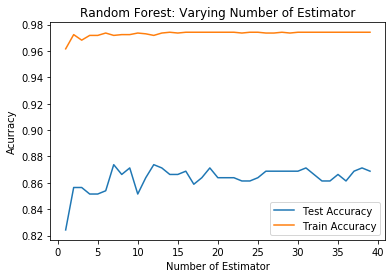

In [177]:
neighbors=np.arange(1,40)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    rf=RandomForestClassifier(n_estimators=k)
    rf.fit(X_train_over,np.ravel(y_train_over))
    train_accuracy[i]=rf.score(X_train_over,y_train_over)
    test_accuracy[i]=rf.score(X_test,y_test)
    
plt.title('Random Forest: Varying Number of Estimator')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Estimator')
plt.ylabel('Acurracy')
plt.show()

In [184]:
rf_over = RandomForestClassifier(n_estimators=12)
rf_over.fit(X_train_over, np.ravel(y_train_over))
print(confusion_matrix(y_test,rf_over.predict(X_test)))
print(classification_report(y_test,rf_over.predict(X_test)))

[[333  27]
 [ 25  19]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       360
           1       0.41      0.43      0.42        44

    accuracy                           0.87       404
   macro avg       0.67      0.68      0.67       404
weighted avg       0.87      0.87      0.87       404



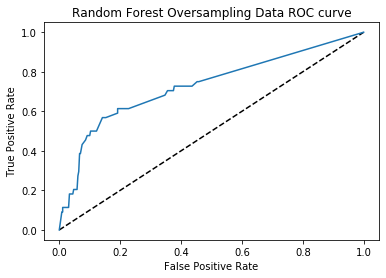

0.7294823232323233


In [192]:
y_pred_prob_rf_over=rf_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_rf_over)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Oversampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_rf_over))

### Undersampling

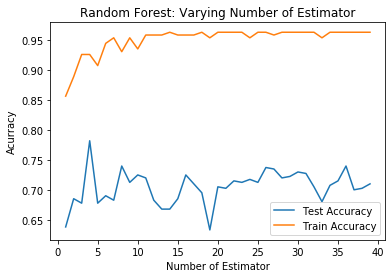

In [175]:
neighbors=np.arange(1,40)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    rf=RandomForestClassifier(n_estimators=k)
    rf.fit(X_train_under,np.ravel(y_train_under))
    train_accuracy[i]=rf.score(X_train_under,y_train_under)
    test_accuracy[i]=rf.score(X_test,y_test)
    
plt.title('Random Forest: Varying Number of Estimator')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Estimator')
plt.ylabel('Acurracy')
plt.show()

In [189]:
rf_under = RandomForestClassifier(n_estimators=4)
rf_under.fit(X_train_under, np.ravel(y_train_under))
print(confusion_matrix(y_test,rf_under.predict(X_test)))
print(classification_report(y_test,rf_under.predict(X_test)))

[[290  70]
 [ 25  19]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       360
           1       0.21      0.43      0.29        44

    accuracy                           0.76       404
   macro avg       0.57      0.62      0.57       404
weighted avg       0.84      0.76      0.80       404



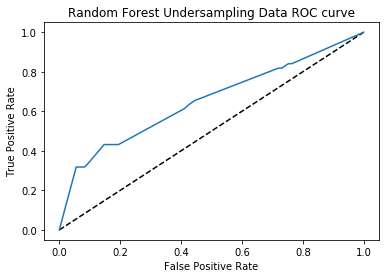

0.6530303030303031


In [190]:
y_pred_prob_rf_under=rf_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_rf_under)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Undersampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_rf_under))

## Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier

### Original Data

In [150]:
dtree_org = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None, min_samples_leaf=15)
dtree_org.fit(X_train, np.ravel(y_train))
print(confusion_matrix(y_test,dtree_org.predict(X_test)))
print(classification_report(y_test,dtree_org.predict(X_test)))

[[360   0]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       360
           1       1.00      0.41      0.58        44

    accuracy                           0.94       404
   macro avg       0.97      0.70      0.77       404
weighted avg       0.94      0.94      0.92       404



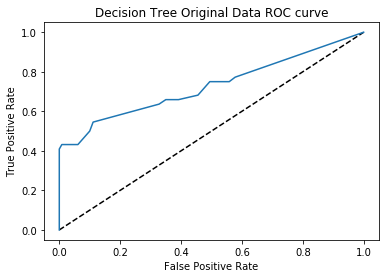

0.727746212121212


In [151]:
y_pred_prob_dtree_org=dtree_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_dtree_org)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Original Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_dtree_org))

### Oversampling

In [152]:
dtree_over = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None, min_samples_leaf=15)
dtree_over.fit(X_train_over, np.ravel(y_train_over))
print(confusion_matrix(y_test,dtree_over.predict(X_test)))
print(classification_report(y_test,dtree_over.predict(X_test)))

[[296  64]
 [ 19  25]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       360
           1       0.28      0.57      0.38        44

    accuracy                           0.79       404
   macro avg       0.61      0.70      0.63       404
weighted avg       0.87      0.79      0.82       404



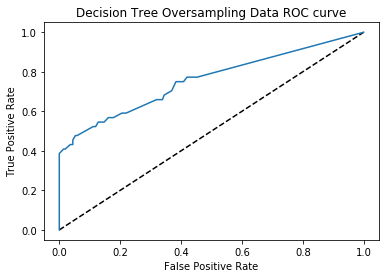

0.756723484848485


In [153]:
y_pred_prob_dtree_over=dtree_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_dtree_over)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Oversampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_dtree_over))

### Undersampling

In [154]:
dtree_under = DecisionTreeClassifier(max_depth=10, random_state=101,max_features=None, min_samples_leaf=15)
dtree_under.fit(X_train_under, np.ravel(y_train_under))
print(confusion_matrix(y_test,dtree_under.predict(X_test)))
print(classification_report(y_test,dtree_under.predict(X_test)))

[[275  85]
 [ 21  23]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       360
           1       0.21      0.52      0.30        44

    accuracy                           0.74       404
   macro avg       0.57      0.64      0.57       404
weighted avg       0.85      0.74      0.78       404



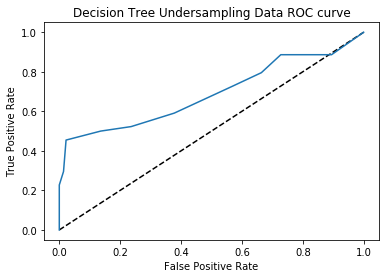

0.6903724747474749


In [155]:
y_pred_prob_dtree_under=dtree_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_dtree_under)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Undersampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_dtree_under))

## Naive Bayes

In [156]:
from sklearn.naive_bayes import GaussianNB

### Original

In [157]:
nb_org = GaussianNB()
nb_org.fit(X_train,np.ravel(y_train))
print(confusion_matrix(y_test,nb_org.predict(X_test)))
print(classification_report(y_test,nb_org.predict(X_test)))


[[355   5]
 [ 44   0]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       360
           1       0.00      0.00      0.00        44

    accuracy                           0.88       404
   macro avg       0.44      0.49      0.47       404
weighted avg       0.79      0.88      0.83       404



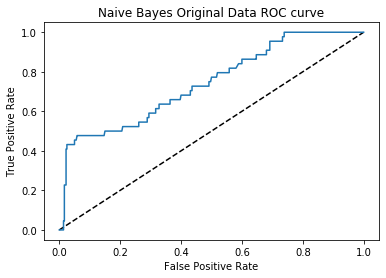

0.7413825757575757


In [158]:
y_pred_prob_nb_org=nb_org.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_nb_org)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Original Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_nb_org))

### Oversampling

In [159]:
nb_over = GaussianNB()
nb_over.fit(X_train_over,np.ravel(y_train_over))
print(confusion_matrix(y_test,nb_over.predict(X_test)))
print(classification_report(y_test,nb_over.predict(X_test)))

[[ 62 298]
 [  0  44]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       360
           1       0.13      1.00      0.23        44

    accuracy                           0.26       404
   macro avg       0.56      0.59      0.26       404
weighted avg       0.91      0.26      0.29       404



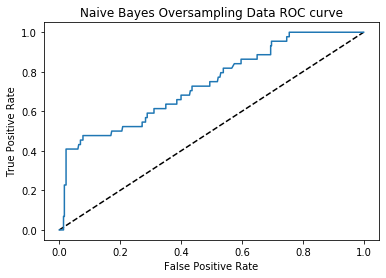

0.7370265151515152


In [160]:
y_pred_prob_nb_over=nb_over.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_nb_over)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Oversampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_nb_over))

### Undersampling

In [161]:
nb_under = GaussianNB()
nb_under.fit(X_train_under,np.ravel(y_train_under))
print(confusion_matrix(y_test,nb_under.predict(X_test)))
print(classification_report(y_test,nb_under.predict(X_test)))

[[351   9]
 [ 29  15]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       360
           1       0.62      0.34      0.44        44

    accuracy                           0.91       404
   macro avg       0.77      0.66      0.69       404
weighted avg       0.89      0.91      0.89       404



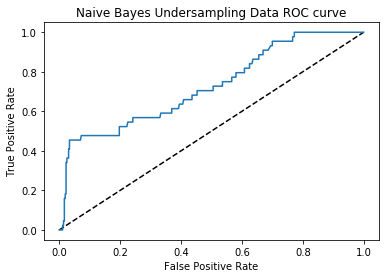

0.7257260101010101


In [162]:
y_pred_prob_nb_under=nb_under.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob_nb_under)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Undersampling Data ROC curve')
plt.show()
print(roc_auc_score(y_test,y_pred_prob_nb_under))

## Results

In [171]:
result=pd.read_excel('/Users/vnguyenair/Desktop/vy_capstone1/Result.xlsx')
result.style.set_properties(subset=['Accuracy'], **{'width': '100px'})

,Algorithm,Data,Accuracy,Precision,Recall,f1 -score,AUC
0,K-Nearest Neighbor,Original (n-neighbors=5),0.93,0.93,0.93,0.91,0.7503
1,K-Nearest Neighbor,Oversampling (n-neighbors=2),0.84,0.86,0.84,0.85,0.6912
2,K-Nearest Neighbor,Undersampling (n-neighbors=6),0.78,0.86,0.78,0.81,0.7234
3,Logistic Regression,Original,0.91,0.91,0.91,0.88,0.7325
4,Logistic Regression,Oversampling,0.92,0.91,0.92,0.91,0.7402
5,Logistic Regression,Undersampling,0.92,0.91,0.92,0.91,0.7601
6,Support Vector Machine,Original,0.93,0.93,0.93,0.91,0.7698
7,Support Vector Machine,Oversampling,0.87,0.88,0.87,0.87,0.7448
8,Support Vector Machine,Undersampling,0.92,0.91,0.92,0.91,0.7422
9,Stochastic Gradient Descent,Original,0.93,0.93,0.93,0.92,7.009


Base on the summary table, Logistic Regression on Undersampling train set is the best model.

## Interest rate & Disbursement

The disbersement table is provided which contains the disbursement amount requested. 

By using **predict_proba** we are going to figure out the probabilty that a company is going to miss payments. By the default, the cut off is 0.5. If a company has more than 50% chance to miss payments, it is label 1('bad' = 1). Is 0.5 the best threshold? We are going to calculate the booksize, profit and margin at different thresholds and pick out the one that works the best for the lender.

In [193]:
disb_df=pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone1/disbursement.csv',low_memory=False)

In [204]:
disb_df.head()

,advanceid,DisbursementAmount
0,1,0.0
1,5,20000.0
2,8,20000.0
3,11,60000.0
4,12,110000.0


In [197]:
join_df.AdvanceId.values

array([33325, 33114, 33075, ..., 14109,  4757,  7140])

In [217]:
disb_join_df = disb_join_df.fillna(disb_join_df.mode().iloc[0])

In [218]:
disb_join_df.head()

,advanceid,DisbursementAmount,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked,reason_bridging_loan,reason_inventory_purchase,AdvanceId
0,4753,100000.0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.75,0.0,0.0,0.0,1,1,4753
1,4757,80000.0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,0.0,0.0,1.0,0,0,4757
2,4897,0.0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,0.0,1.0,0.0,0,0,4897
3,4919,100000.0,0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.25,0.0,0.0,0.0,6,1,4919
4,4920,175000.0,0,0.0,-12444.6,1.0,1.0,1.0,0.0,0.0,0.75,0.0,0.0,0.0,0,1,4920


In [219]:
y_pred_prob=logreg_under.predict_proba(X)[:,1]

In [224]:
prob_df = pd.DataFrame({'AdvanceId':join_df.AdvanceId.values,'Probability':y_pred_prob})

In [225]:
prob_df.head()

,AdvanceId,Probability
0,33325,0.557723
1,33114,0.500000
2,33075,0.268975
3,32689,0.936960
4,32563,0.011236


In [226]:
prob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 2 columns):
AdvanceId      1346 non-null int64
Probability    1346 non-null float64
dtypes: float64(1), int64(1)
memory usage: 21.2 KB


In [258]:
disb_prob_df=pd.merge(disb_df,prob_df,
                left_on='advanceid',
                right_on= 'AdvanceId',
                how='right')

In [259]:
disb_prob_df.head()

,advanceid,DisbursementAmount,AdvanceId,Probability
0,4753,100000.0,4753,0.500000
1,4757,80000.0,4757,0.500000
2,4897,0.0,4897,0.500000
3,4919,100000.0,4919,0.500000
4,4920,175000.0,4920,0.345434


In [230]:
disb_prob_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1346 entries, 0 to 1345
Data columns (total 4 columns):
advanceid             1346 non-null int64
DisbursementAmount    1346 non-null float64
AdvanceId             1346 non-null int64
Probability           1346 non-null float64
dtypes: float64(2), int64(2)
memory usage: 52.6 KB


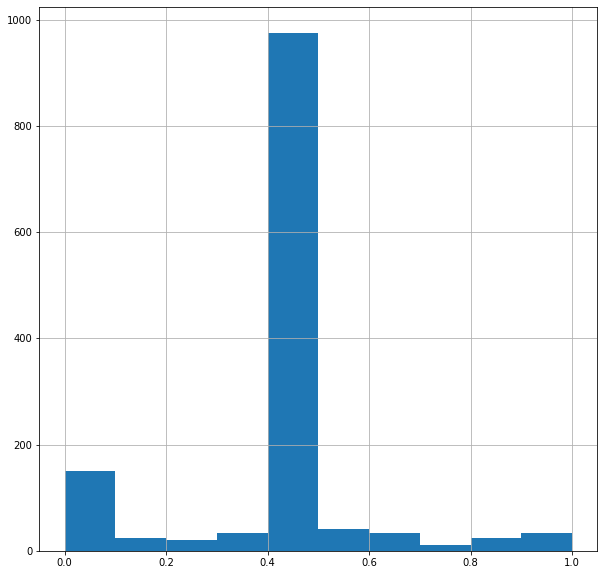

<Figure size 432x288 with 0 Axes>

In [233]:
disb_prob_df.Probability.hist(figsize=(10,10))
plt.figure()
plt.show()

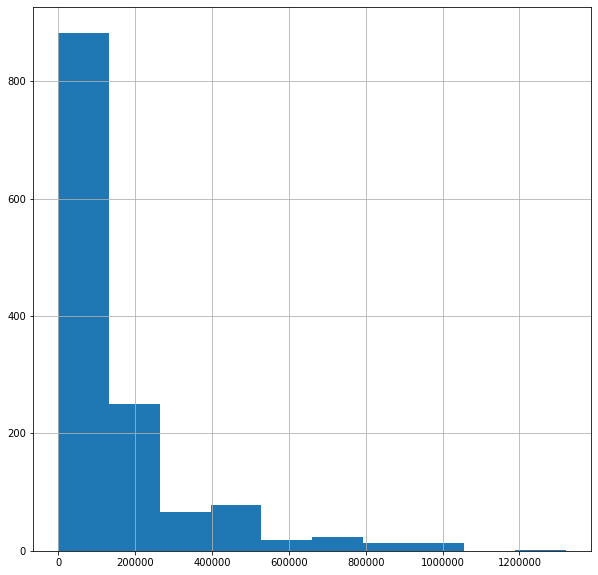

<Figure size 432x288 with 0 Axes>

In [234]:
disb_prob_df.DisbursementAmount.hist(figsize=(10,10))
plt.figure()
plt.show()

In [284]:
threshold = [0, 0.1, 0.12, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
margins= []
Profits = []
Booksizes = []
interest_rate = 0.12
for k in threshold :
    lended = ((disb_prob_df.Probability<= k).values)*1
    total_disb = (disb_prob_df['DisbursementAmount']*lended).sum()
    Gain = interest_rate *((disb_prob_df['DisbursementAmount']*lended*(1-disb_prob_df['Probability'])).sum())
    margin = Gain/total_disb
    Profits.append(Gain)
    margins.append(margin)
    Booksizes.append(total_disb)
    
print(Booksizes)
print(Gains)    
print(margins)   


[0.0, 50858820.269999996, 51309820.269999996, 53946509.14999999, 55732326.44, 58529835.92999999, 180699629.89999998, 182715697.15, 185516367.54, 187838034.25, 194686468.09]
[0.0, 6039308.3772993395, 6087324.268663658, 6355784.258035964, 6516984.481210171, 6731253.809323331, 14078383.727097305, 14190035.068024553, 14309365.677239407, 14375091.034009265, 14487204.92126604]
[nan, 0.118746529023634, 0.1186385810090786, 0.11781641404012821, 0.11693365228932603, 0.11500551304079715, 0.07791041816127874, 0.07766182812621336, 0.07713263183721028, 0.0765291815973594, 0.07441300396167683]


/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


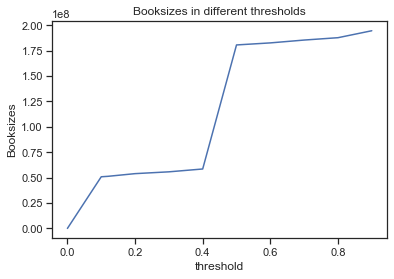

In [390]:
plt.plot(threshold,Booksizes)
plt.xlabel('threshold')
plt.ylabel ('Booksizes')
plt.title('Booksizes in different thresholds')
plt.show()

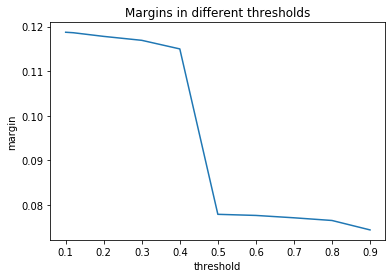

In [282]:
plt.plot(threshold,margins)
plt.xlabel('threshold')
plt.ylabel ('margin')
plt.title('Margins in different thresholds')
plt.show()

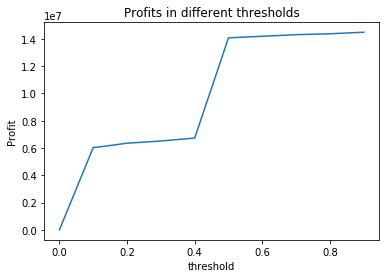

In [283]:
plt.plot(threshold,Gains)
plt.xlabel('threshold')
plt.ylabel ('Profit')
plt.title('Profits in different thresholds')
plt.show()

As the threshold increases, the profit increases but the booksize also increases. Therefore we have to look at the margins to see the proportion of the profit over the booksize. When the threshold is 0.1, we get the highest margin (0.1187), the booksize is 50858820 and the profit is 6039308. When the threshold is 0.4, the margin is 0.115, the booksize is 58529835 and the profit is 6731253. 